# Lunch & Learn Level 2 Agentic AI Bootcamp

## SRE Agentic AI Lab : Autonomous Incident Remediation
### The Problem

MetLife Insurance is striving to improve service reliability and enhance customer satisfaction by modernizing the operations behind its core insurance services—including policy management, claims processing, payments, and the customer portal. However, the Site Reliability Engineering (SRE) team currently faces significant challenges in maintaining seamless service delivery and minimizing downtime during system incidents.<br>

The incident management process is predominantly manual, requiring SREs to monitor disparate system dashboards, interpret performance metrics, analyze logs, and identify root causes before applying remediation. When services degrade or fail, it often leads to delays in detection and resolution, affecting both internal workflows and end-user experience.<br>

Moreover, the lack of intelligent automation in incident response extends resolution times, introduces operational inefficiencies, and increases the risk of prolonged service disruptions. This reactive approach limits the team's ability to proactively prevent issues or scale operations effectively. To summarize, some of the key challenges faced by SREs at MetLife Insurance include: <br>

•	**Manual and fragmented processes** slow down the detection, diagnosis, and resolution of service incidents.<br>
•	**Reliance on human expertise** to interpret logs and metrics delays response time during critical outages.<br>
•	**Lack of integrated tools** hinders rapid identification of root causes and effective execution of fixes.<br>
•	**Extended service downtime** negatively impacts customer experience and trust in digital insurance services.<br>
<br>
An intelligent, autonomous SRE AI Agent equipped with advanced observability, automated root cause analysis, and pre-defined remediation playbooks could dramatically improve system resilience—enabling faster, more reliable, and scalable operations while reducing the burden on human engineers.
<br>

### Objective
MetLife Insurance plans to implement an AI-powered SRE Agent Assistant to support their Site Reliability Engineering (SRE) team in maintaining service reliability and minimizing system downtime. The goal is to create an AI-powered agentic solution that assists SREs in executing the following tasks:
<br>
*  **Check service health**<br>
   Check the health status of a service in the system.<br>
   Queries the service registry to retrieve current health metrics and determine if a service is functioning accordingly. This helps verify service availability, troubleshoot incidents, validate deployments, and assess the health ofupstream<br>
   downstream dependencies.<br>
*  **Restart services**<br>
  Perform a service restart to recover from degraded or unhealthy states.<br>
  Initiates a restart of the specified service—commonly used as a remediation action during incident response when a service is unhealthy.<br>
*  **View incident history**<br>
  Retrieve historical incident data for pattern analysis and reporting.<br>
  Fetches past incidents to identify recurring issues, support root cause analysis, and improve incident response over time.<br>
*  **Find unhealthy services**<br>
  List services that are degraded or unhealthy.<br>
  Enables quick identification of problematic services to prioritize investigation and resolution.<br>
*  **List all services**
  Return the current health status of all services.<br>
  Provides a unified view of overall system health, aiding in monitoring, incident management, and proactive maintenance.<br>


By automating these tasks, MetLife insurance aims to reduce operational overhead, accelerate incident response, and improve system resilience—ultimately enhancing customer experience and trust in their digital insurance services at scale.<br>
<br>
We're tracking 4 services (policy-api, claims-api, payment-api, customer-api). We have added some mock incident data for each service. You will notice in the lab that Claims-api and Payment-api are degraded and have open incidents.

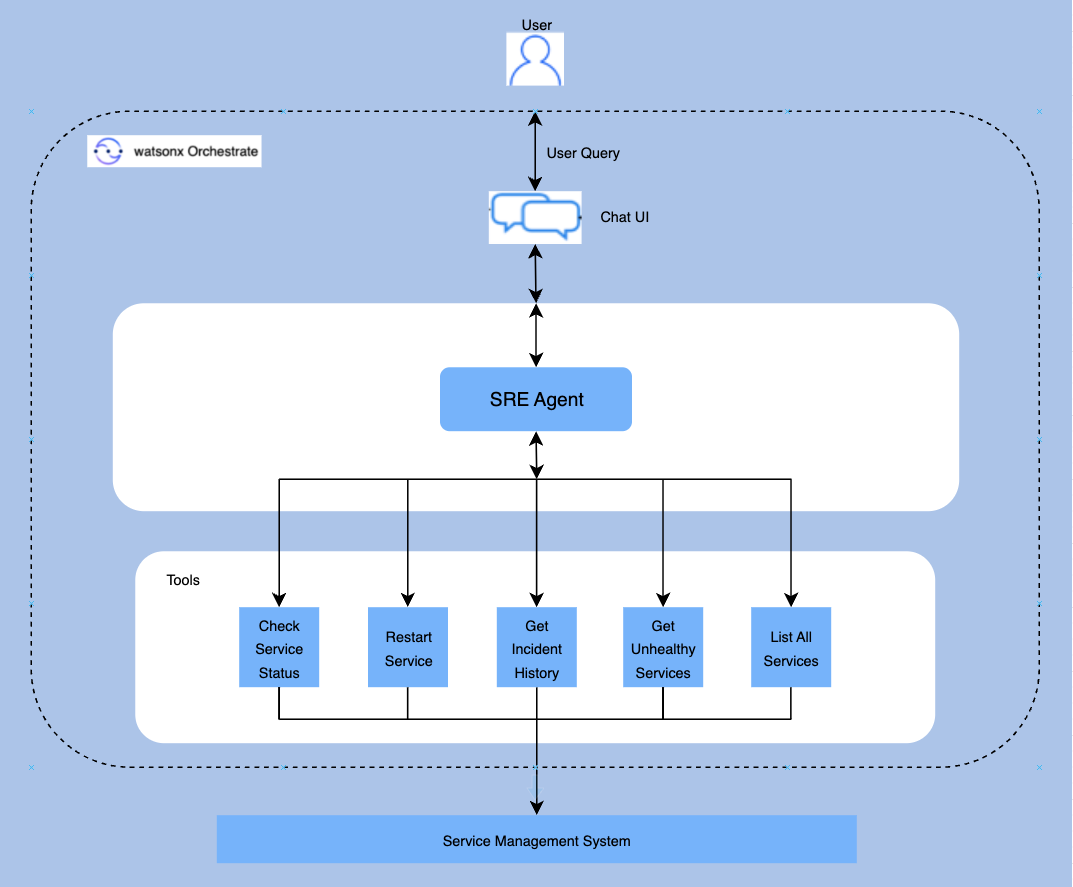

## [Configuring the ADK](https://developer.watson-orchestrate.ibm.com/getting_started/installing#ibm-cloud)

### Installing the ADK

Requires Python 3.11

In [ ]:
!python --version

Install latest ```ibm-watsonx-orchestrate```

In [ ]:
!pip install --upgrade ibm-watsonx-orchestrate

### Identify watsonx Orchestrate Credentials for ADK Configuration

To connect to IBM Cloud you need both the **service instance URL** and an **API key** of your watsonx orchestrate instance 

**1.)** Login to watsonx Orchestrate Instance. The lab guide has instructions on how to login to your watsonx Orchestrate instance, please follow those instructions if the link [here](https://us-south.watson-orchestrate.cloud.ibm.com/chat) does not take you directly to watsonx Orchestrate.<br>
<br>
**2.)** Click your user icon on the top right and click **Settings**<br>
<br>
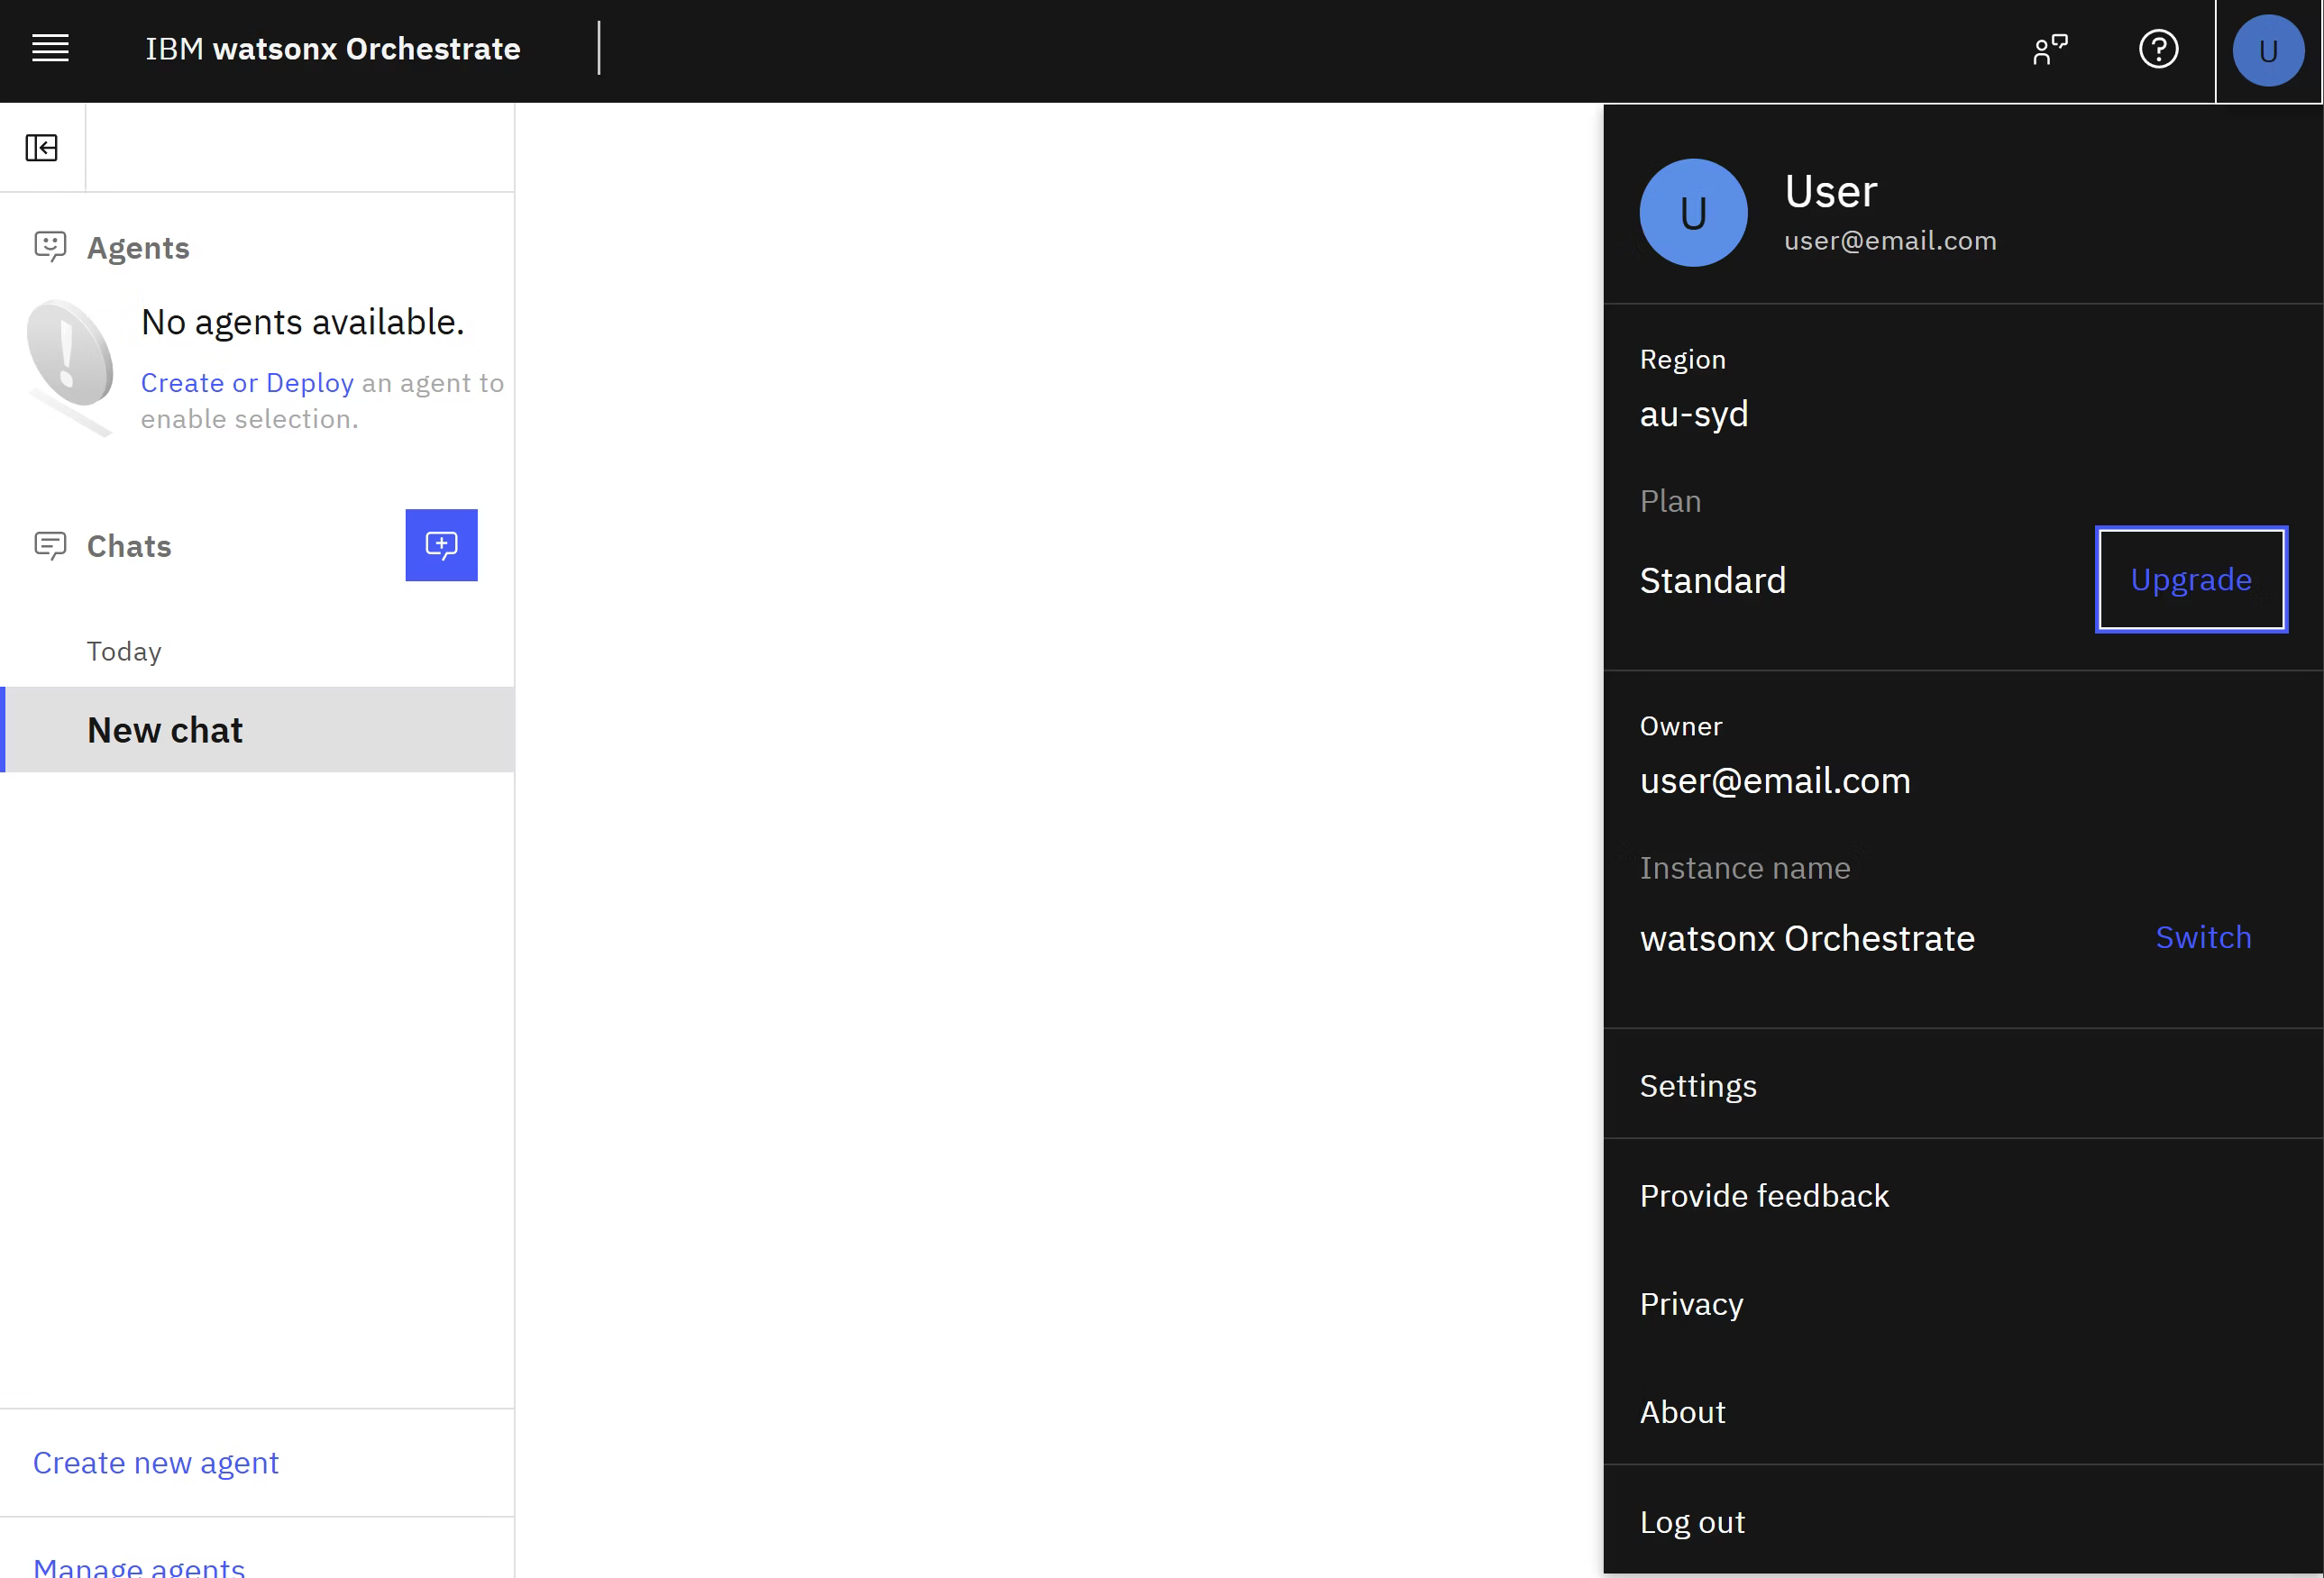
<br>
**3.)** Go the **API details** tab <br>
<br>
**4.)** Copy the **service instance URL**, store somewhere that you can reference it later<br>
<br>
**5.)** Click the **Generate API Key** button <br>
<br>
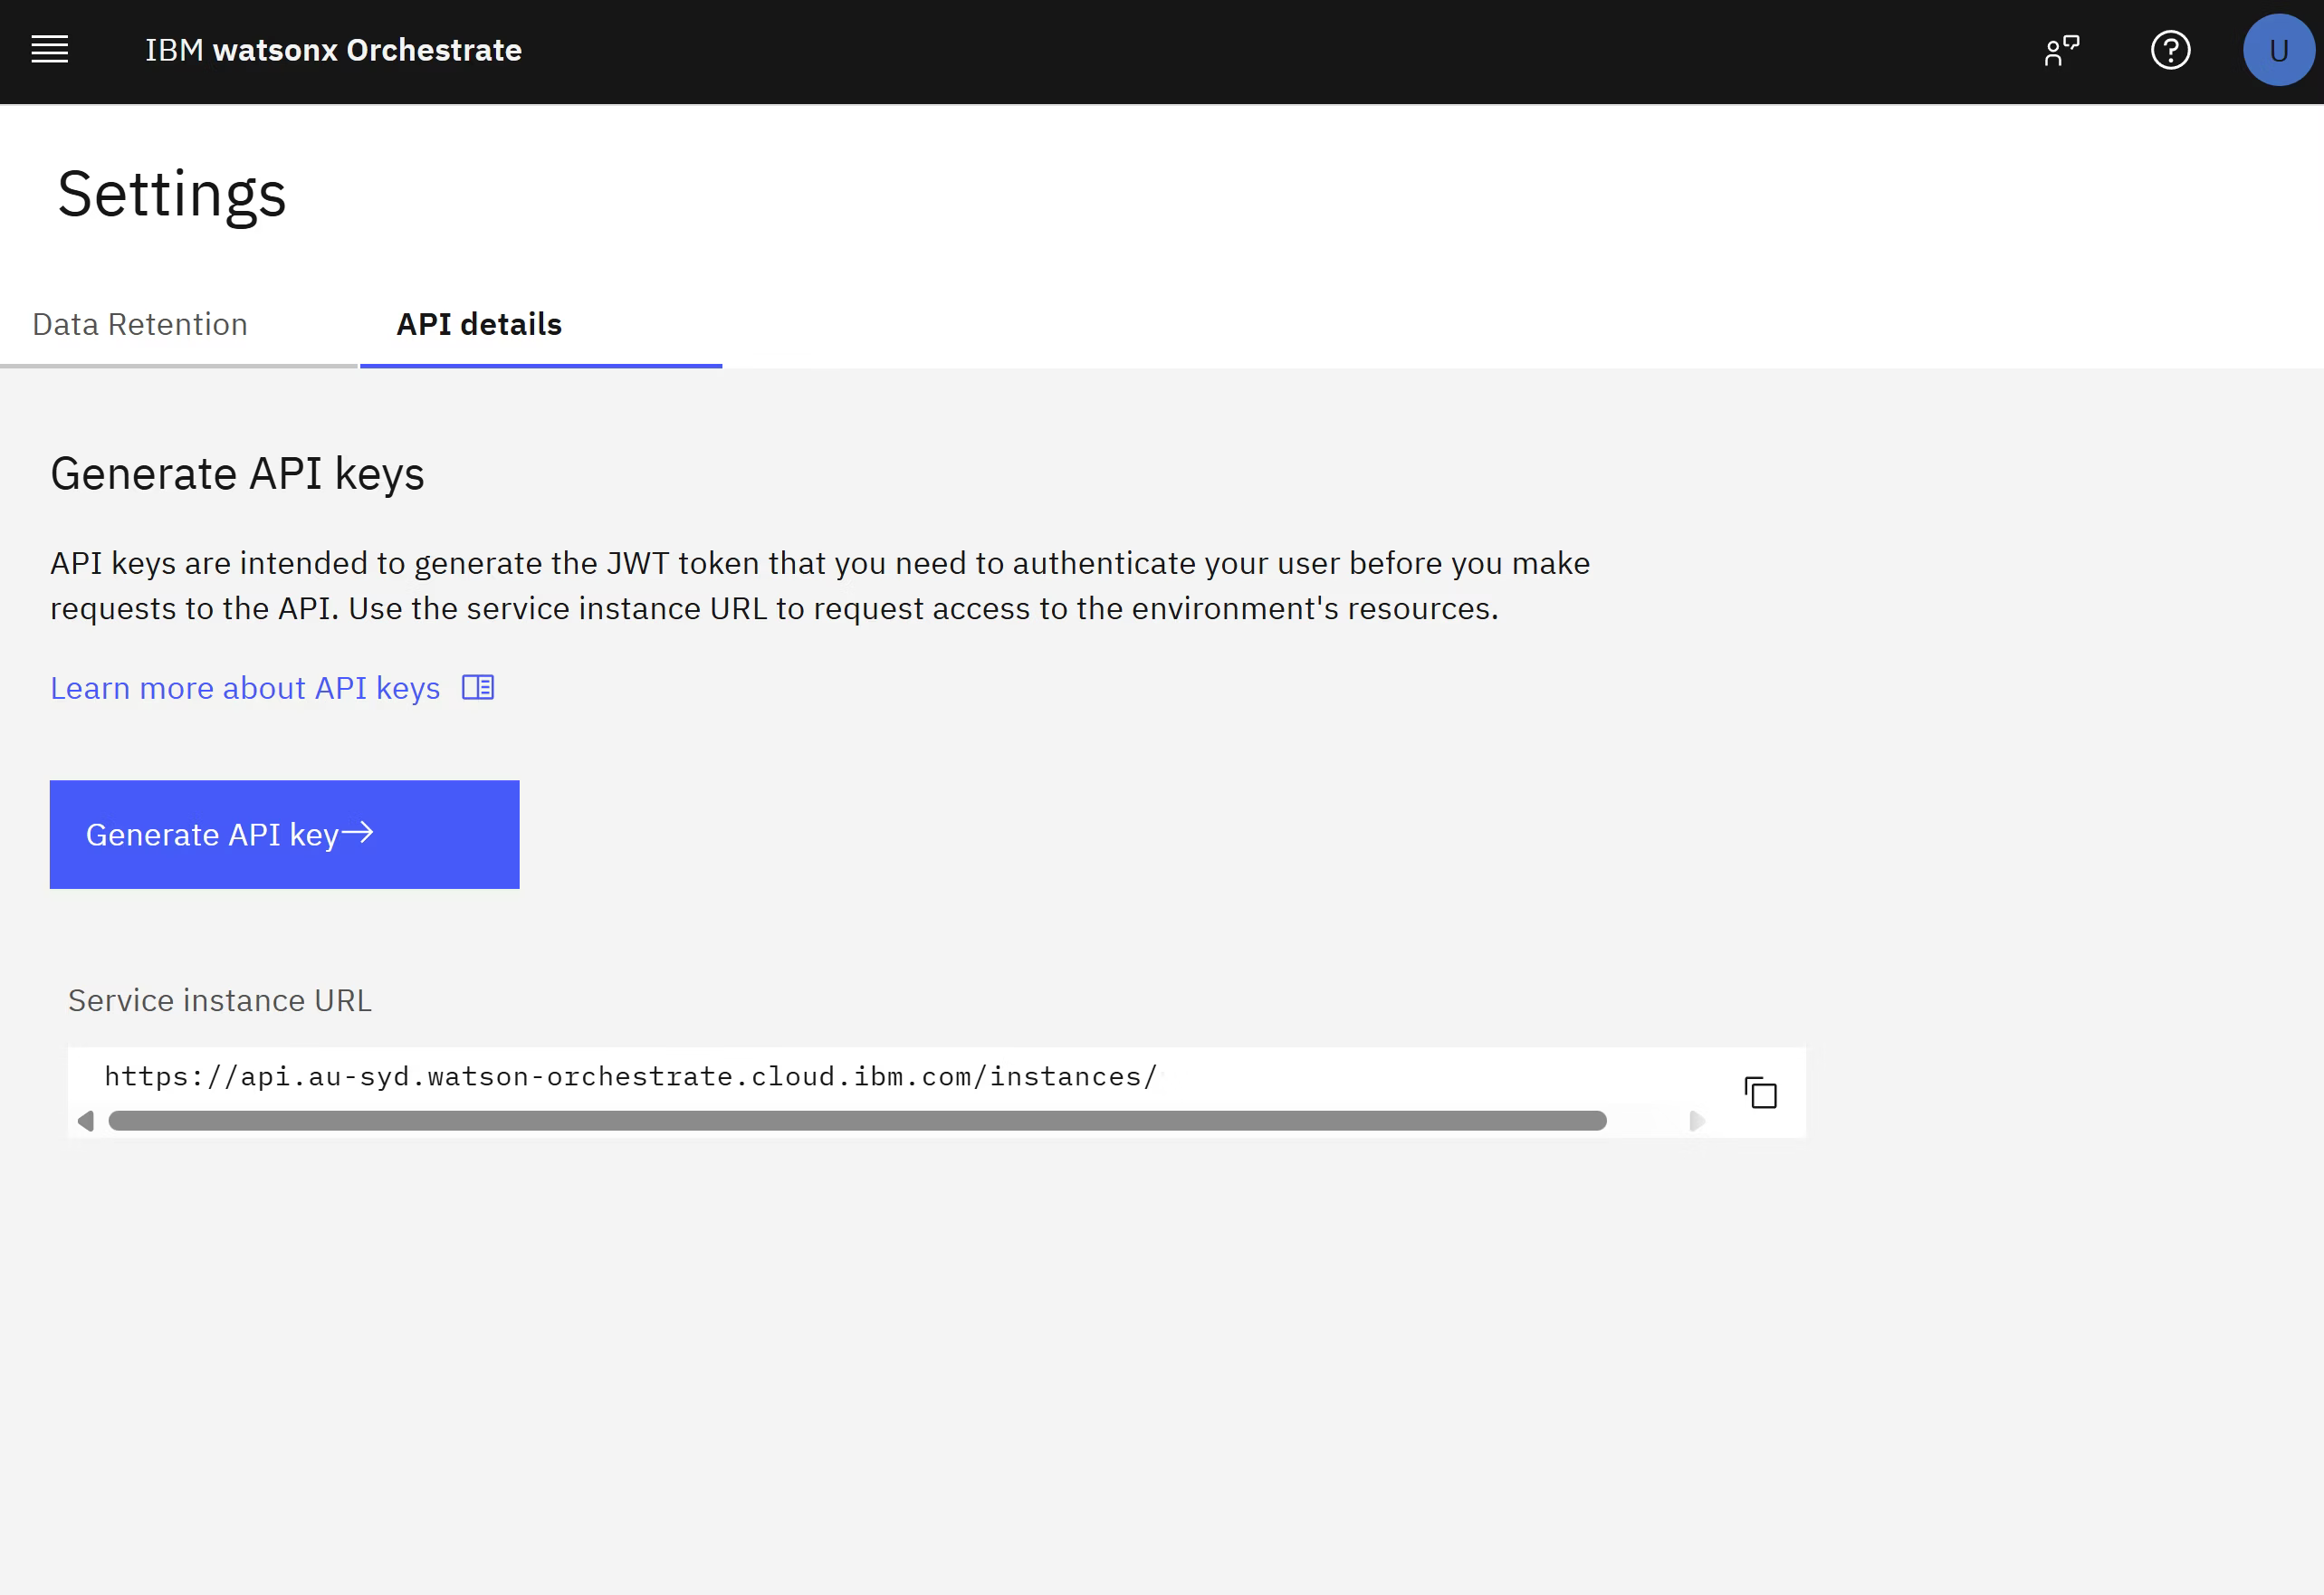
<br>
**6.)** **Generate an API Key**<br>
The page redirects you to the IBM Cloud Identity Access Management center. Click **Create** to create a new API key.<br>
<br>
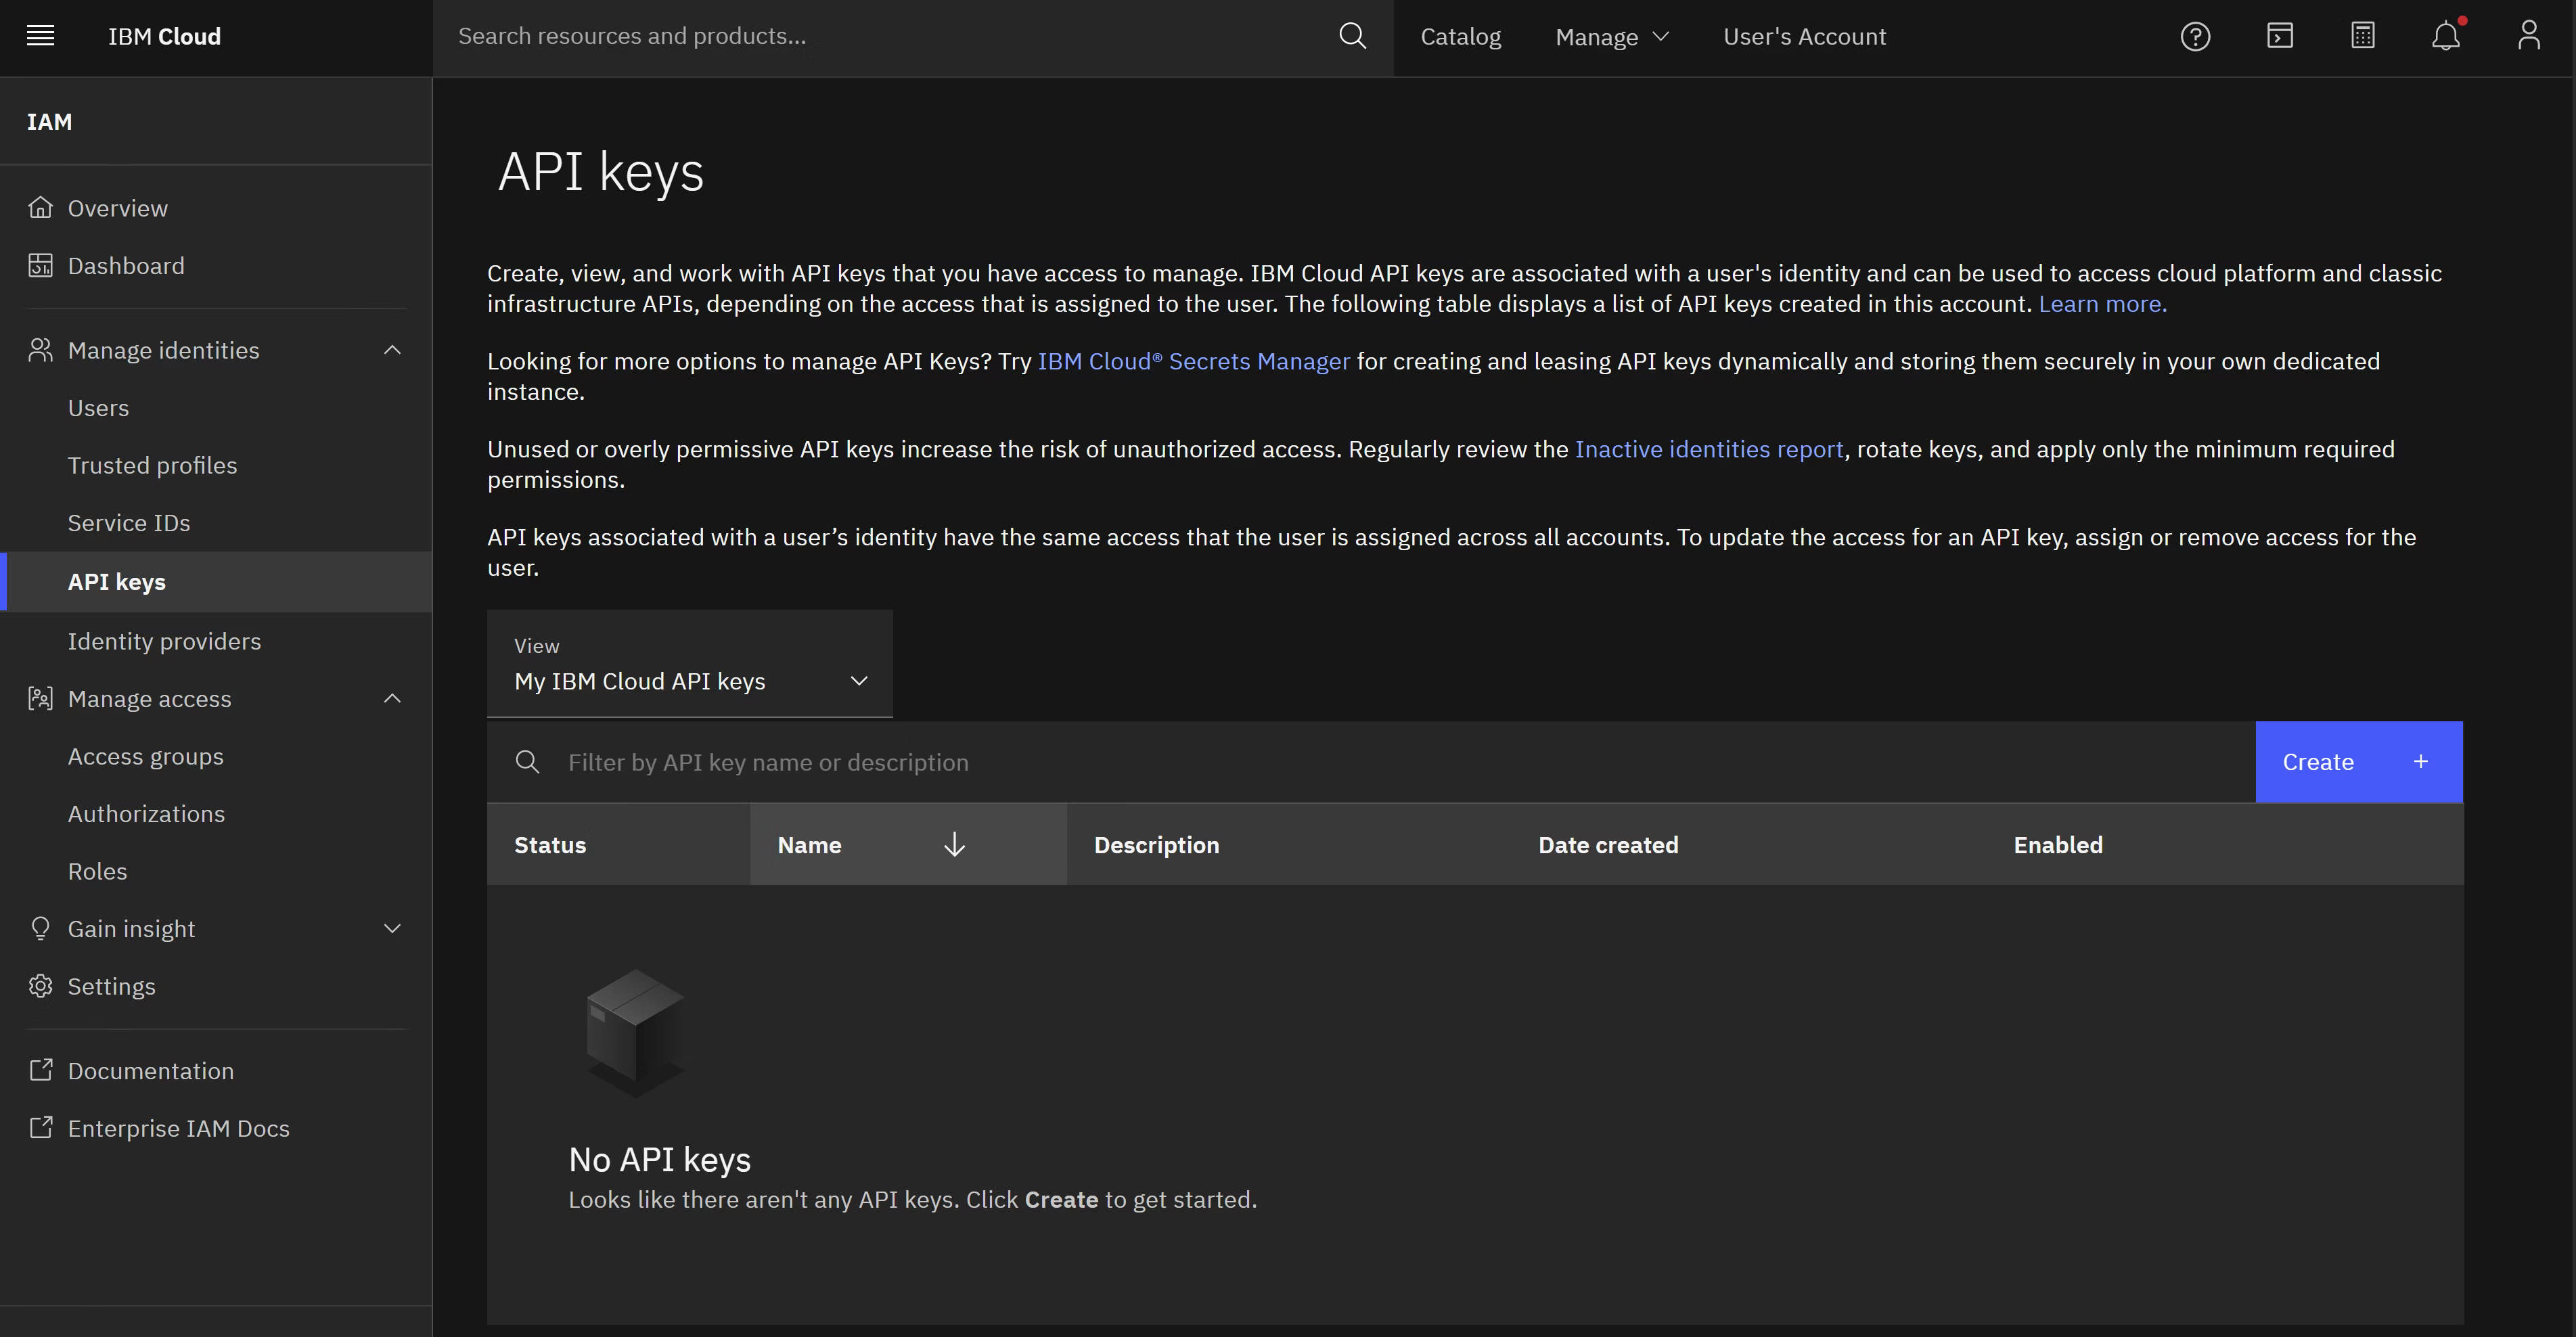
<br>
**7.)** Enter a name and description for your API key <br>
<br>
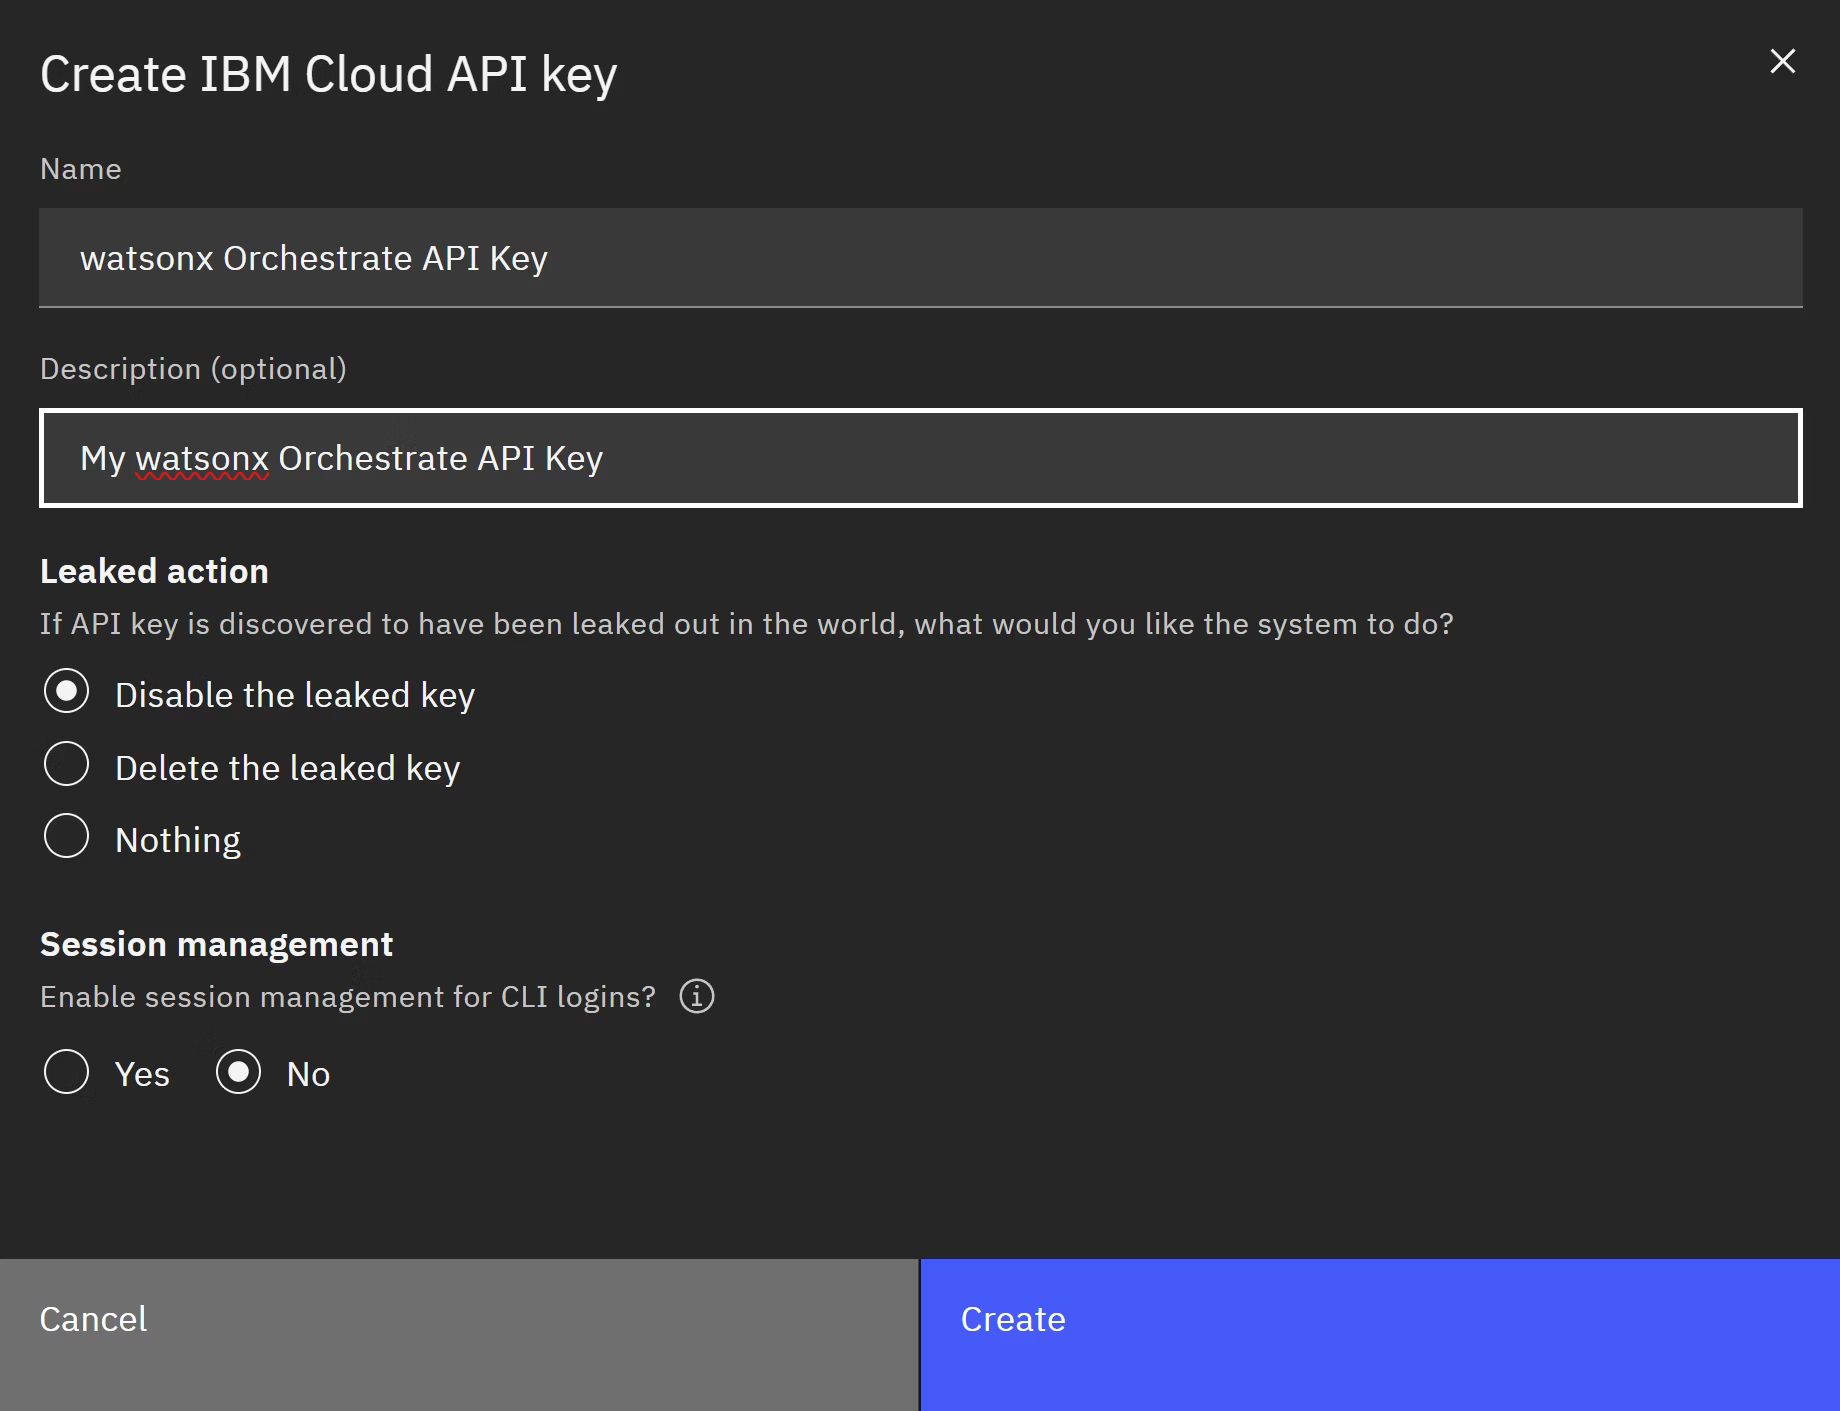
<br>
**8.)** Copy the API key and store it in a safe location on your local device, you can also save them as variables in the cell block below <br>
<br>
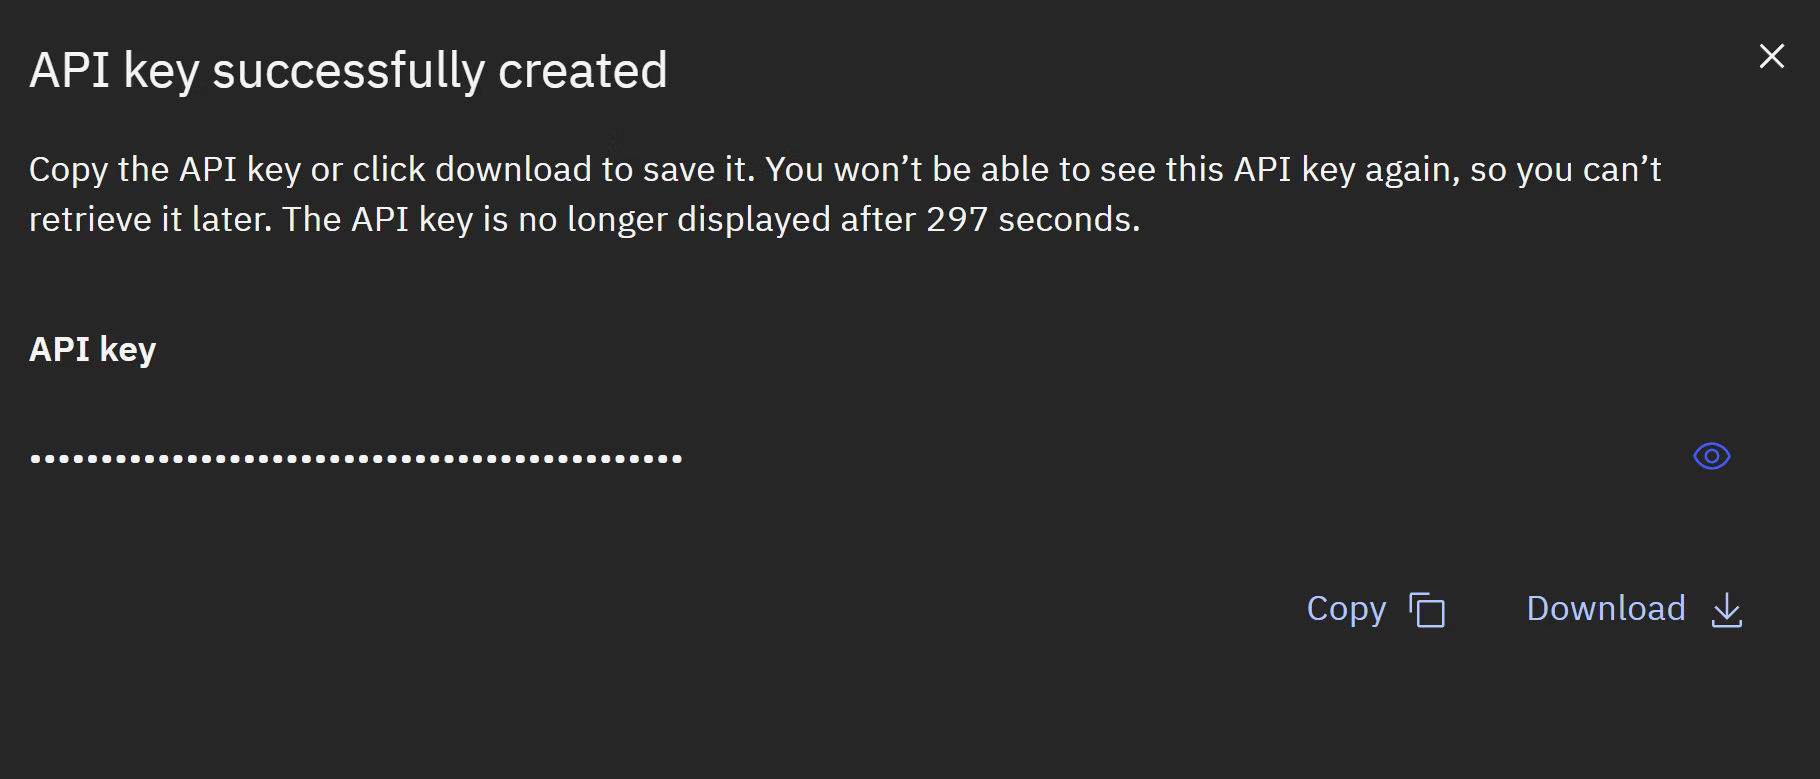
<br>

In [ ]:
service_instance_url = ""
api_key = ""

### Create and Activate watsonx Orchestrate ADK Environment

**9.)** View all active environments with the ADK CLI<br>

To view all environments within your watsonx orchestrate instance type ```orchestrate env list``` in the terminal. It will denote whether that env is a remote instance or hosted locally.

In [ ]:
! orchestrate env list

If you want to remove an existing env you can using the below command<br>
```echo y | orchestrate env remove -n <env-name>```

In [ ]:
# ! echo y | orchestrate env remove -n <env-name>

**10.)** Add an environment with the ADK CLI.<br>

Replace ```<env-name>``` with an environment name of your choice, this will be your environment name used during the lab. Please choose a unique name like ```metlife_env_<your initials>```. This will allow you to differentiate your env from other individuals in the lab. Replace ```service-instance-url``` with the value from earlier in the lab <br>

```
orchestrate env add -n <env-name> -u <service-instance-url> --type ibm_iam
```

In [ ]:
! orchestrate env add -n <environment-name> -u <service-instance-url> --type ibm_iam

You should now see your new environment in the list of environments 

In [ ]:
! orchestrate env list

**11.)** Now that you have created the environment you need to activate it to use it locally. Activate your remote environment using the below command. You will need to replace ```env-name``` and ```api-key``` with their respective values from earlier in the lab<br>

```
orchestrate env activate <env-name> --api-key <api-key>
```

In [ ]:
! orchestrate env activate <environment-name> --api-key <api-key>

Under your list of environments you should now see ```active``` next to your environment

In [ ]:
! orchestrate env list

You can connect to local or remote environments. We are connecting to a remote environment hosted on IBM Cloud. More details [here](https://developer.watson-orchestrate.ibm.com/environment/initiate_environment)<br>

## Create SRE Autonomous Incident Remediation Agent

### Define Agent

#### Make Agent Directory

**12.)** To store all Agent and tool related code for the SRE Agent you must create a directory. <br>

Run ```ls``` you should see no files within your env

In [ ]:
!ls

Make a directory using the ```mkdir``` command. This is the directory where your agent and its tools sit. We are creating an SRE Agent. You can give your directory a name associated with that like ```sre-metlife```

In [ ]:
! mkdir sre-metlife

In [ ]:
!ls

#### Create and Update Agent Configuration Yaml
**13.)** Open a text editor, such as Visual Studio Code or Notepad<br>
**14.)**  To create the agent, copy the following code. This defines the agent, its tools, knowledge base, instructions, llm, description, etc. Later you can make changes to this to see how it impacts your Agent performance. <br>

Paste the below yaml code in the text editor. And make the following changes before saving : 

* Give your agent a unique name. The ```name``` listed in this file will be the name of your deployed agent. Please change the ```name``` with a unique name so you can differentiate your agent from other individuals within the lab.
* Rename the ```tools```, by adding a post-fix like your initials. ```(e.g. check_service_status_df)```

Make sure you update the names in corresponding sections below.<br>

Save the file as ```sre_agent.yaml``` locally.

```yaml
spec_version: v1
kind: native
name: metlife_sre_helper
description: Simple SRE helper
style: default
llm: watsonx/meta-llama/llama-3-2-90b-vision-instruct
instructions: "You are an SRE assistant for MetLife's infrastructure (policy-api, claims-api, payment-api, customer-api). Check service health, analyze incident patterns, and help troubleshoot issues.  Use list_all_services for overviews, get_unhealthy_services to  identify problems, check_service_status for details, get_incident_history for patterns, and  restart_service only for degraded/unhealthy services after explaining why. Be concise, include relevant metrics, and provide actionable recommendations."
tools:
  - check_service_status
  - restart_service
  - get_incident_history
  - get_unhealthy_services
  - list_all_services
```

 <br><br>

#### Load Agent Yaml to Watson Studio

**15.)** Upload the ```sre_agent.yaml``` file in the top right into watson Studio. Click **Upload asset to Project**, drag and drop or browse for the file to upload

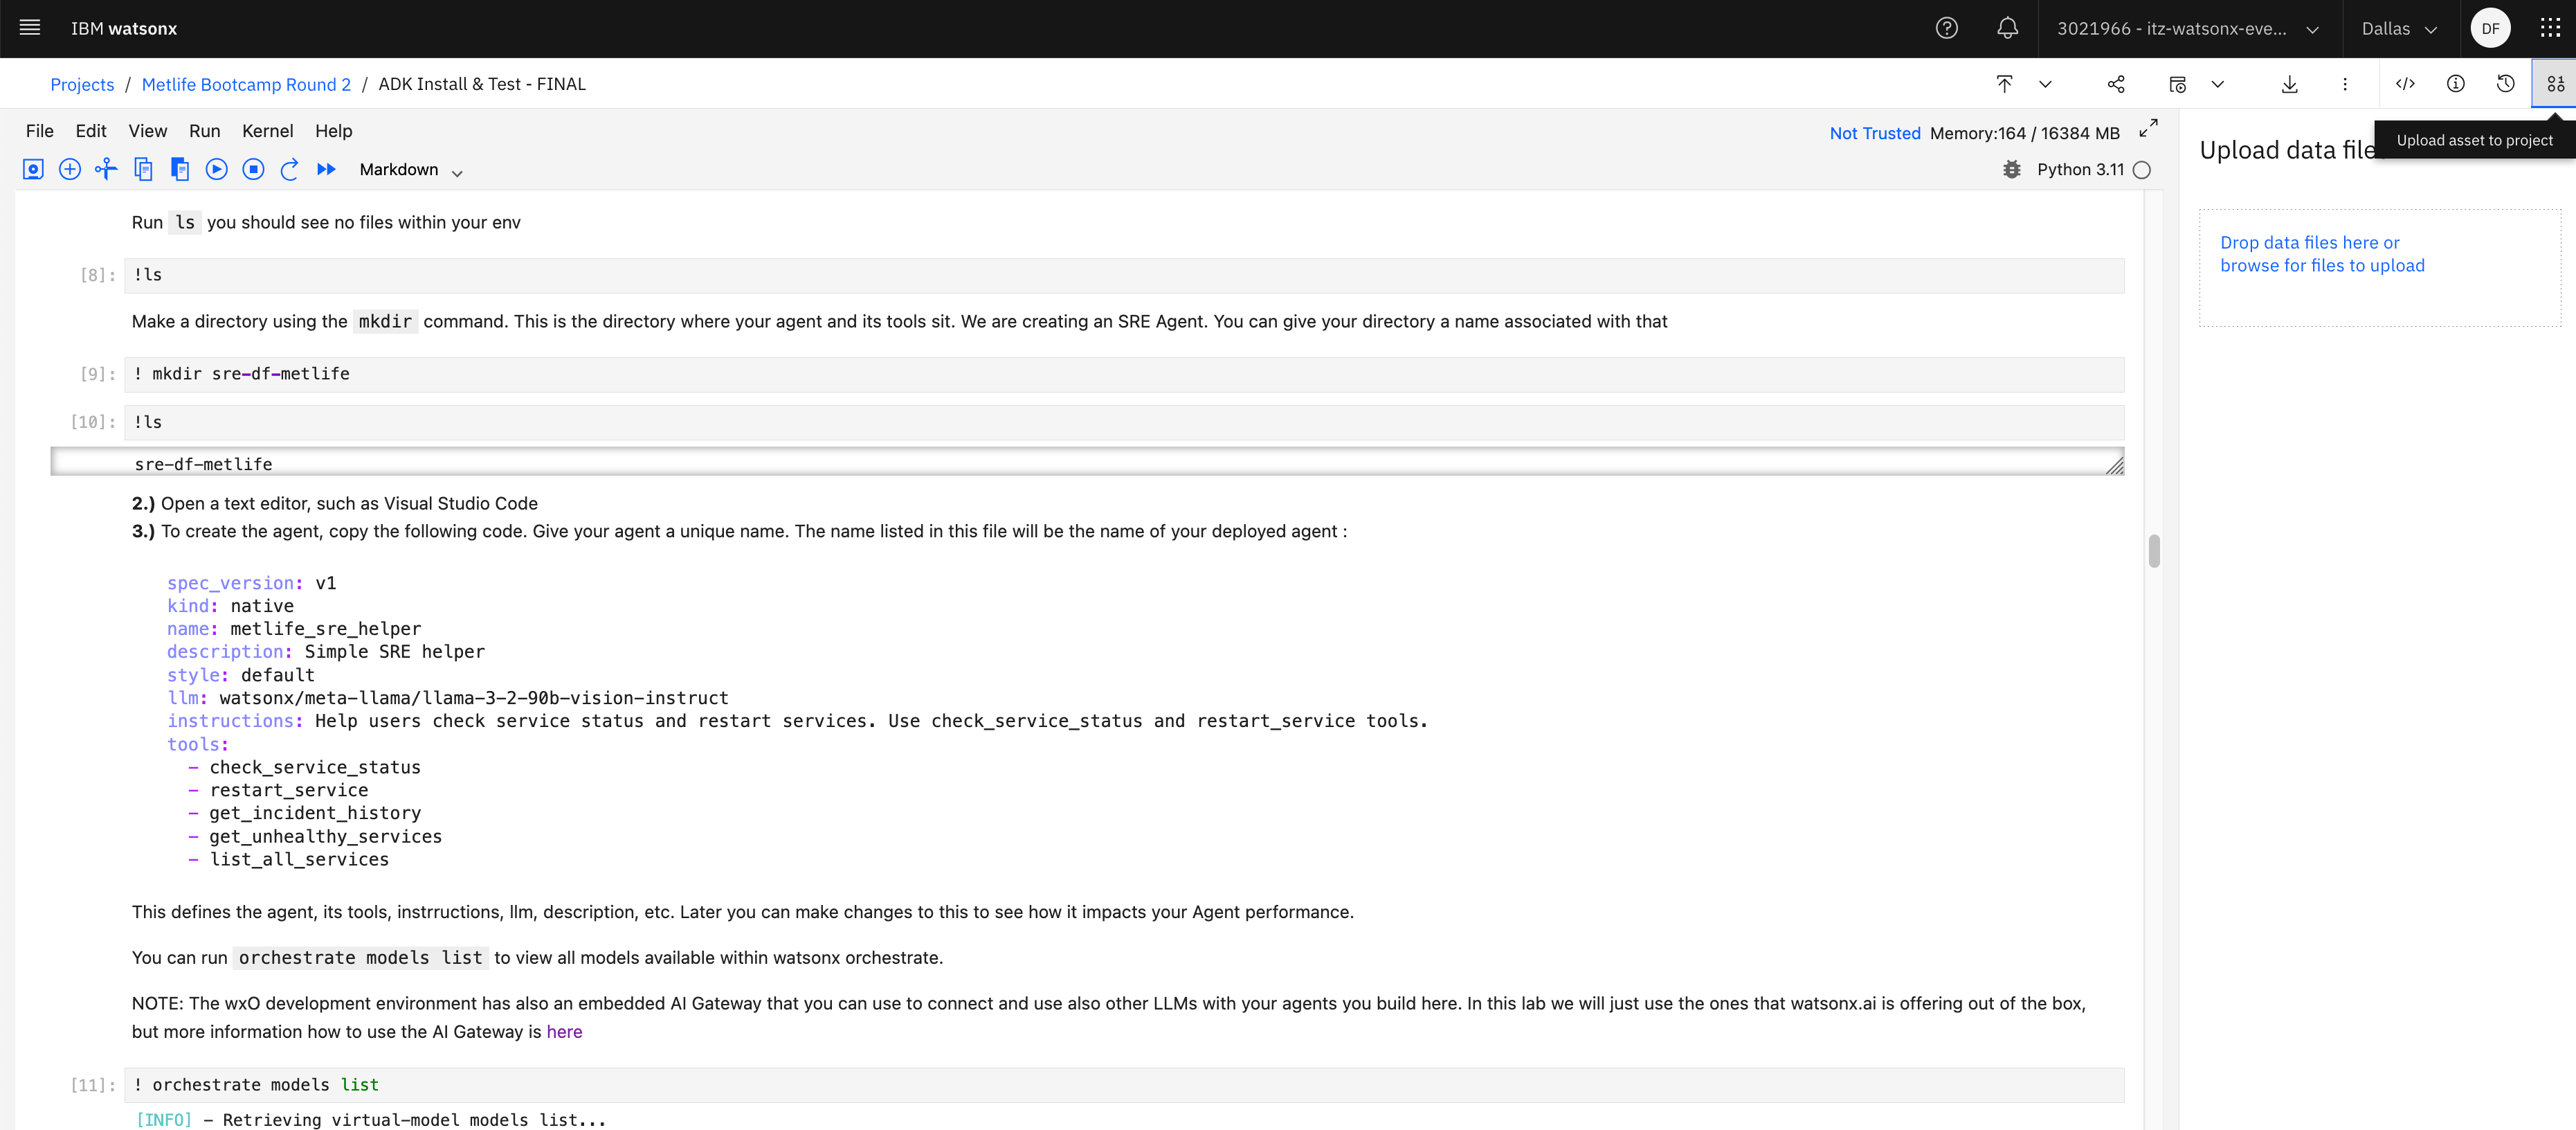

**16.)** Use **Code Snippets** on the right to load your yaml file in this notebook. <br>

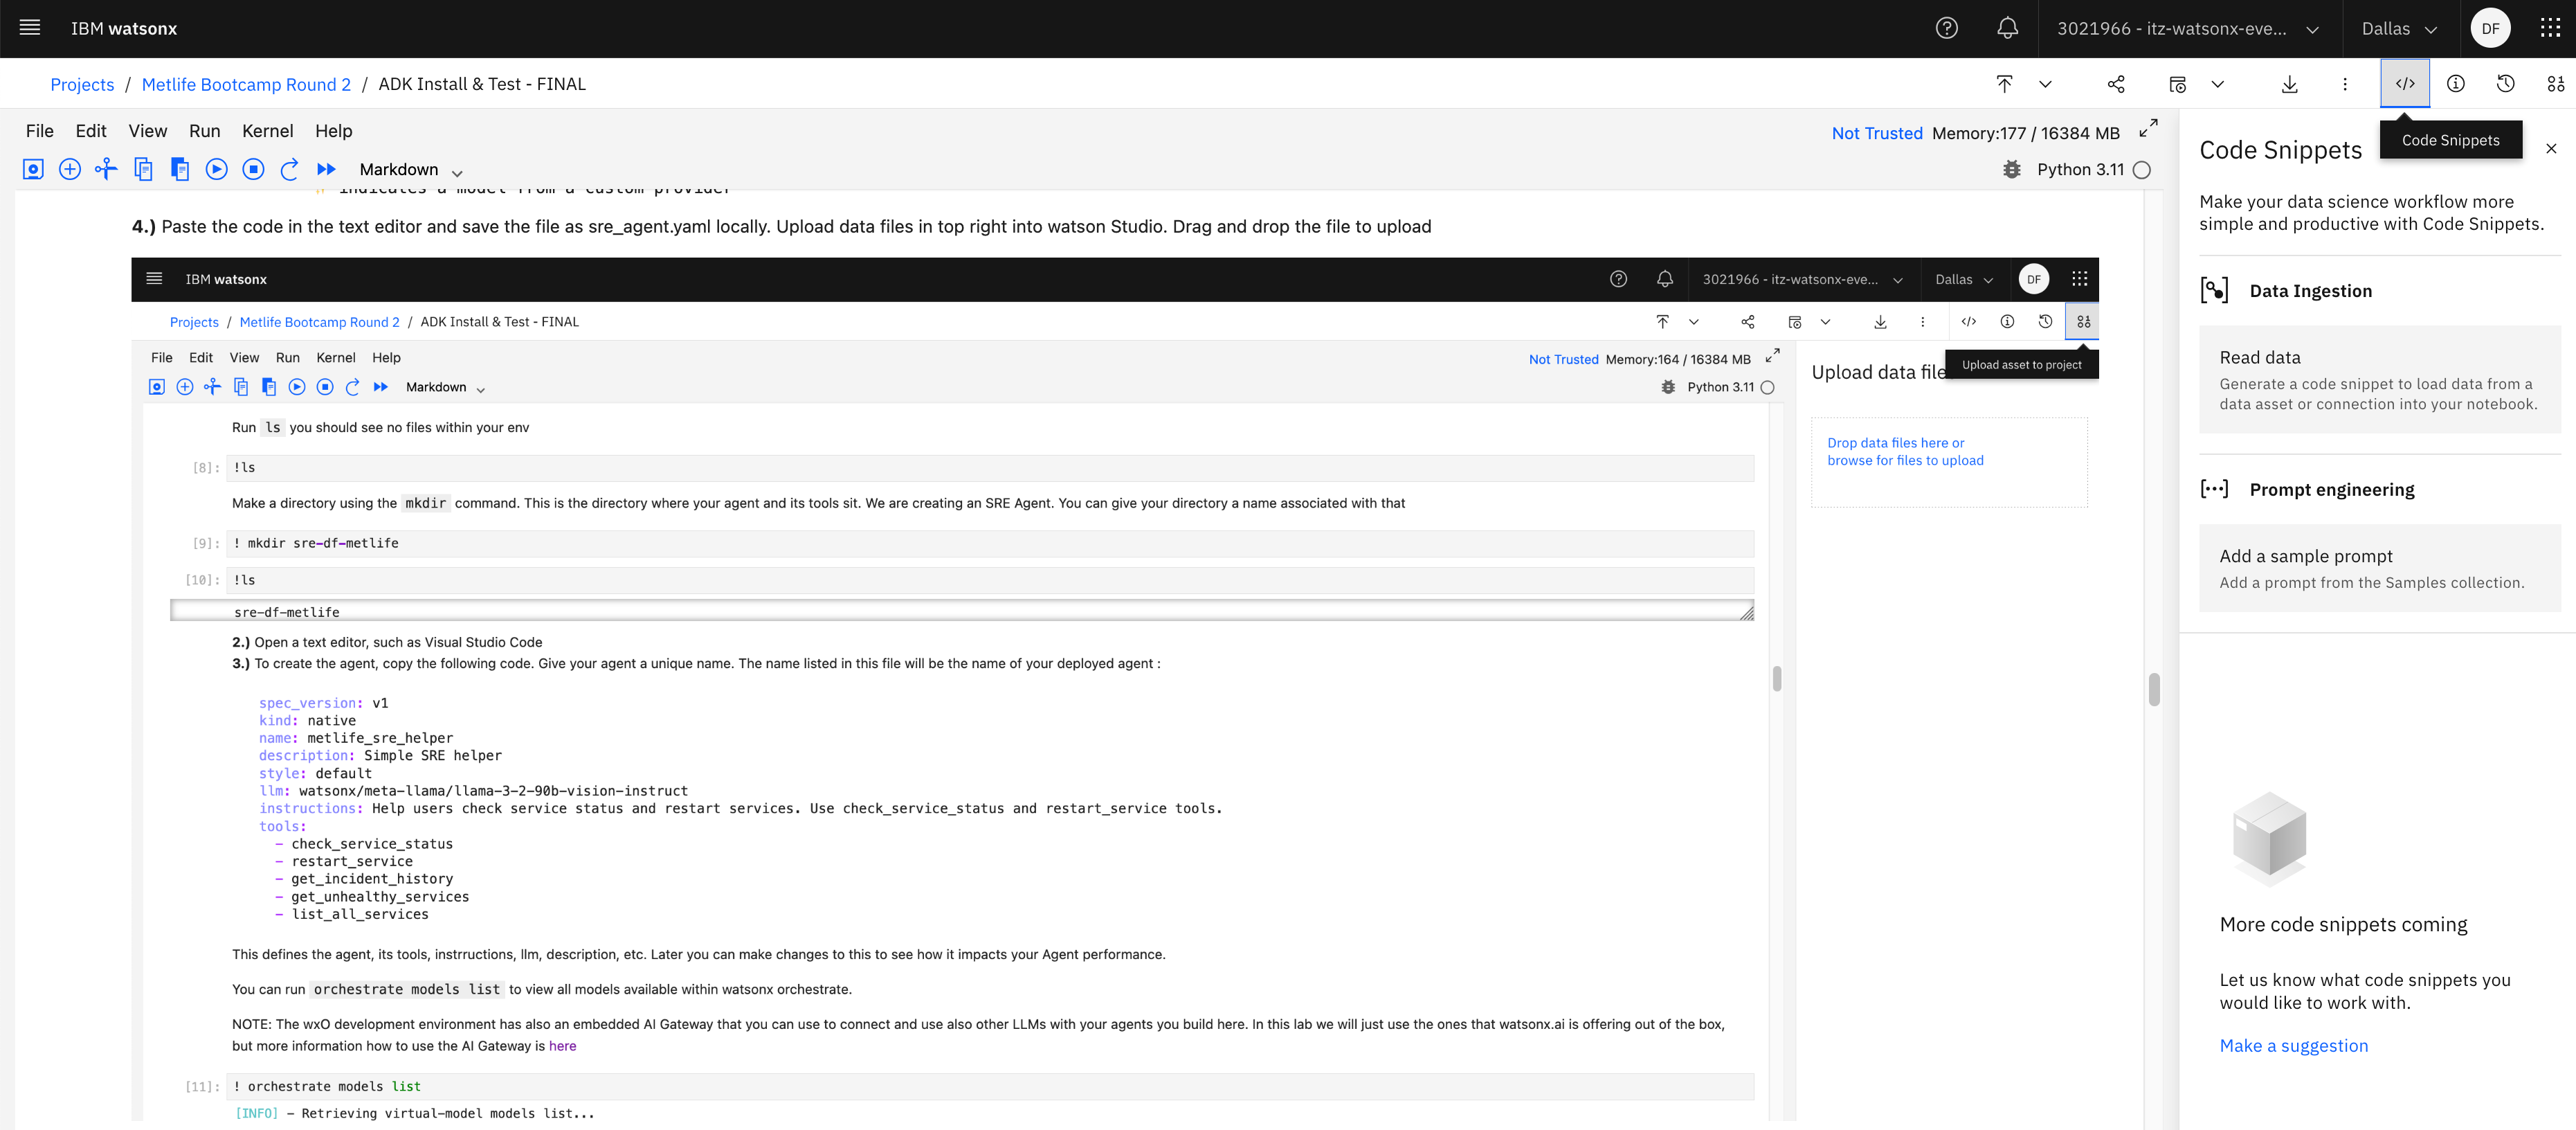

**17.)** Select **Read Data** under **Data Ingestion**. <br>

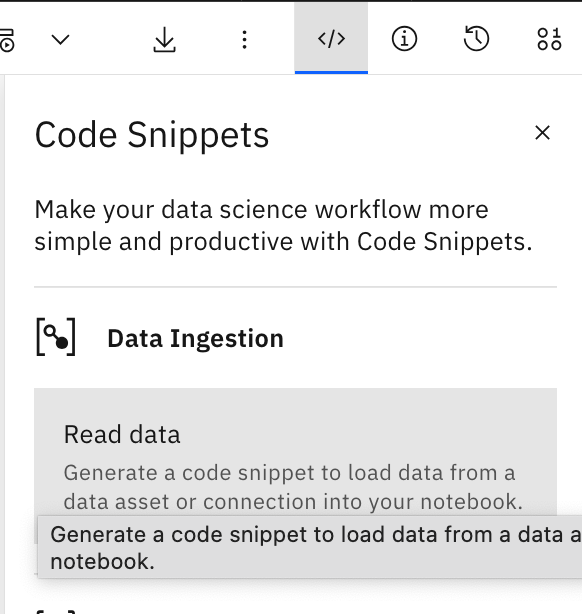
<br>
<br>
Then **Select data from Project** to select the yaml file that you uploaded.<br>
<br>
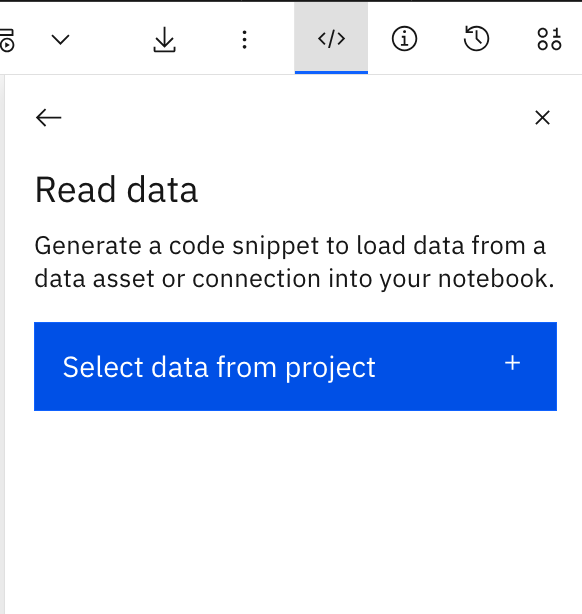

**18.)** Select **Data Asset** -> and then choose the SRE Agent yaml file that you uplpaded. Click the **Select** button in the bottom right. <br>

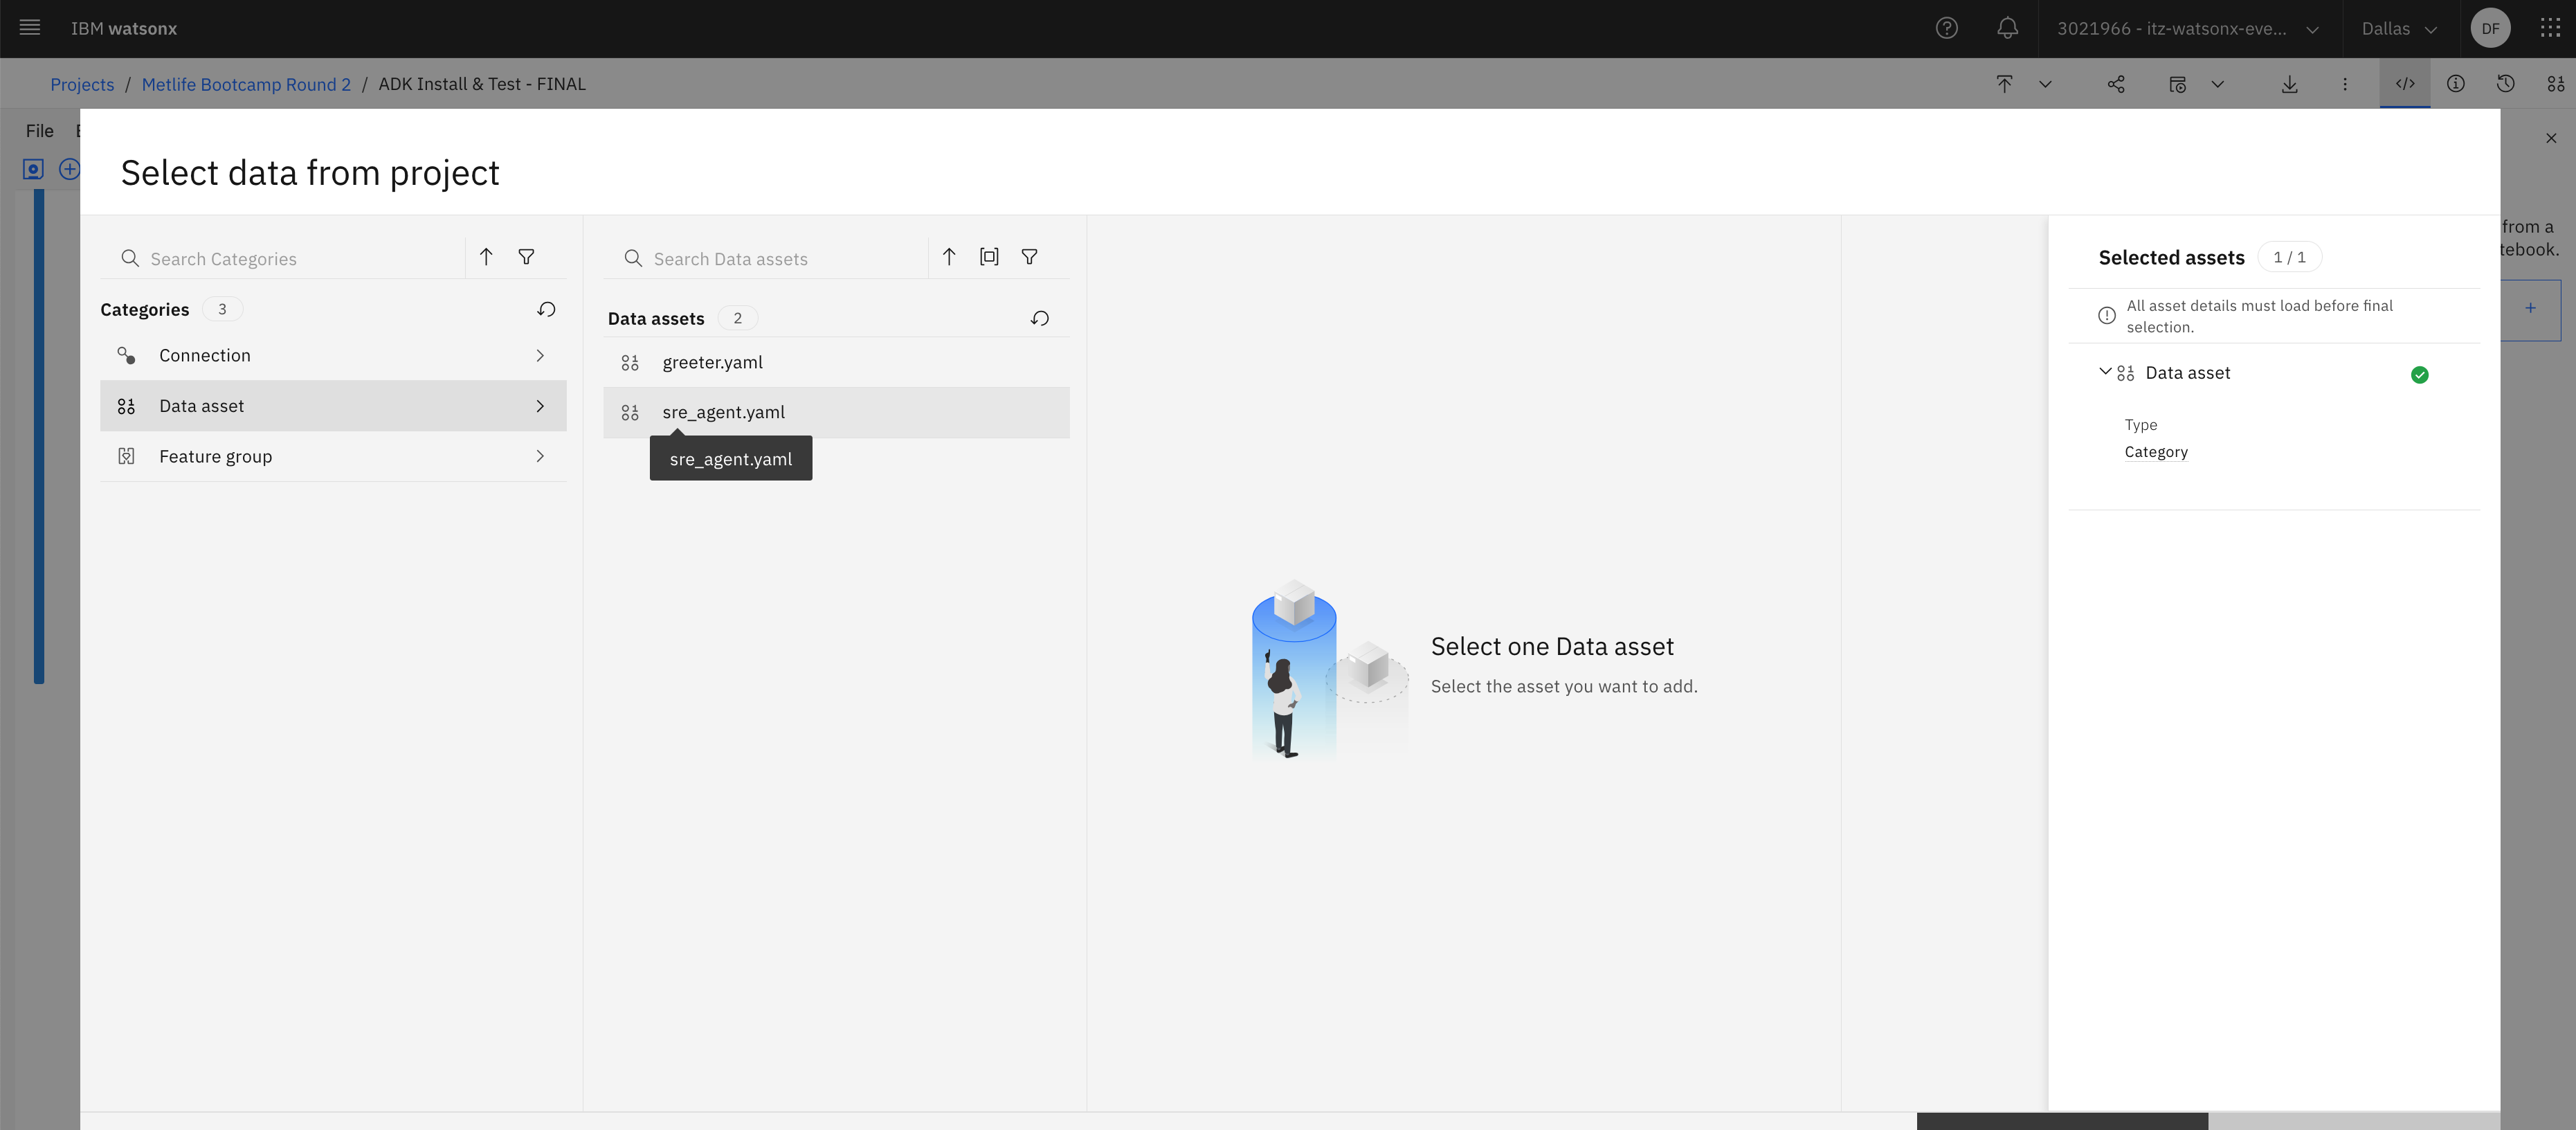

<br>

The next option will ask how you want to load the file. Select **load as** and choose **Credentials** from the drop down. Then select **Insert code to cell** or use the copy button to bring the code into the next cell

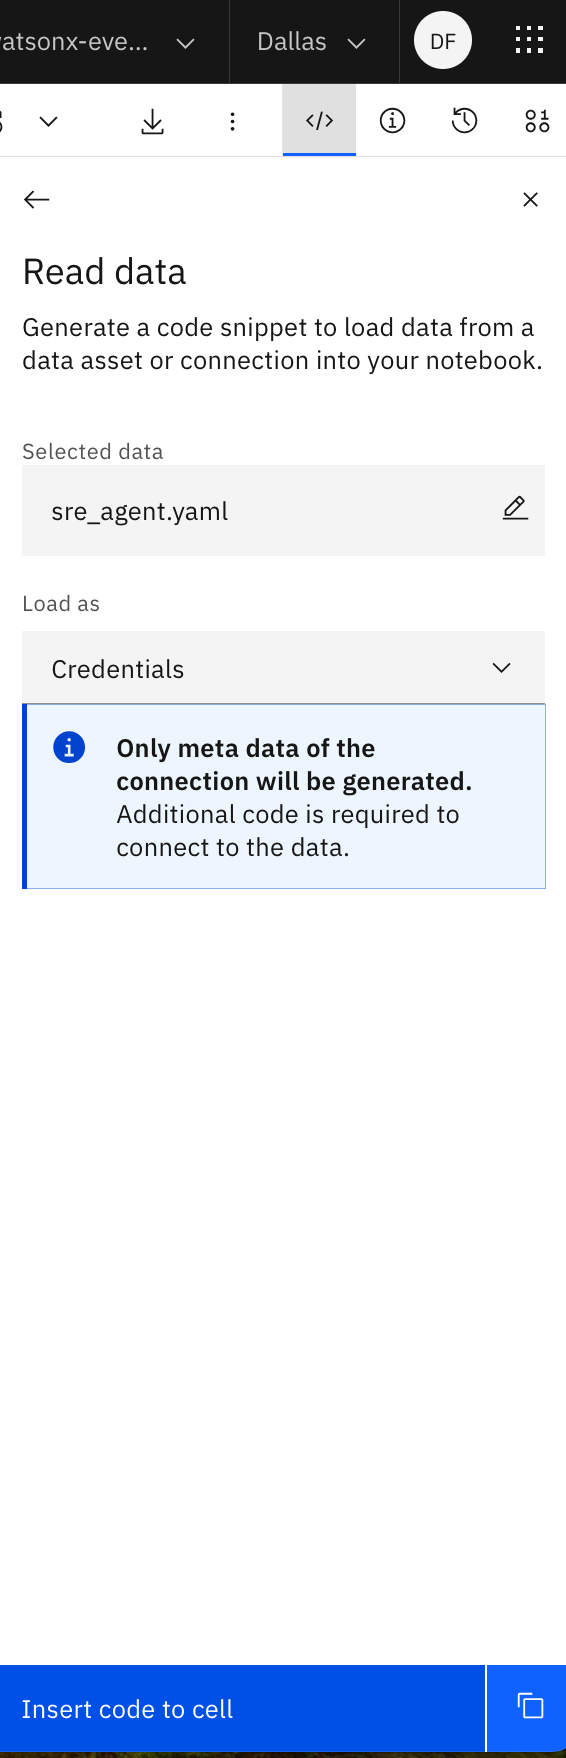

The cell will look similar to the block below : 

```python 
storage_metadata = {
    'IAM_SERVICE_ID': '',
    'IBM_API_KEY_ID': '',
    'ENDPOINT': '',
    'IBM_AUTH_ENDPOINT': '',
    'BUCKET': '',
    'FILE': ''
}
```

In [ ]:
# @hidden_cell
# The following code contains metadata for a file in your project storage.
# You might want to remove secret properties before you share your notebook.

storage_metadata = {
    'IAM_SERVICE_ID': '',
    'IBM_API_KEY_ID': '',
    'ENDPOINT': '',
    'IBM_AUTH_ENDPOINT': '',
    'BUCKET': '',
    'FILE': ''
}

#### Download Agent Yaml within Environment

**19.)** Use the below ```cos_client``` code block with the credentials you copied from above to create a variable to connect to the Cloud Object Storage Client. Then use the ```download_file``` function to download the ```sre_agent.yaml``` file into the environment

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=storage_metadata['IBM_API_KEY_ID'],
    ibm_auth_endpoint=storage_metadata['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=storage_metadata['ENDPOINT'])

In [ ]:
cos_client.download_file(Bucket = storage_metadata['BUCKET'],
                         Key = storage_metadata['FILE'], 
                         Filename = storage_metadata['FILE'])

**20.)** Running ```ls``` you can see all files within the environment. We need to store the ```sre_agent.yaml``` inside the ```sre-metlife``` folder. All tools/files associated with the agent and its tools must be stored within the agent directory. 

In [ ]:
!ls

Run the below command to load the file within this env to ensure it looks correct.

In [ ]:
import yaml
from IPython.display import display, Markdown

file_name = "sre_agent.yaml"

with open(file_name, "r") as file:
    data = yaml.safe_load(file)

formatted_yaml = yaml.dump(data, sort_keys=False, default_flow_style=False)
display(Markdown(f"```yaml\n{formatted_yaml}\n```"))

**21.)** Move ```sre_agent.yaml``` inside the ```sre-metlife``` folder. 

In [ ]:
!mv sre_agent.yaml ./sre-metlife/

In [ ]:
!ls -l ./sre-metlife/

### Define Tools
#### Create Tools

The last part of the agent to create and define are the tools. We have created SRE Tools that allow you to check the health of services and incidents related to site reliability. 5 tools have been created : 
<br>

*  **Check service health**<br>
   Check the health status of a service in the system.<br>
   Queries the service registry to retrieve current health metrics and determine if a service is functioning accordingly. This helps verify service availability, troubleshoot incidents, validate deployments, and assess the health ofupstream<br>
   downstream dependencies.<br>
*  **Restart services**<br>
  Perform a service restart to recover from degraded or unhealthy states.<br>
  Initiates a restart of the specified service—commonly used as a remediation action during incident response when a service is unhealthy.<br>
*  **View incident history**<br>
  Retrieve historical incident data for pattern analysis and reporting.<br>
  Fetches past incidents to identify recurring issues, support root cause analysis, and improve incident response over time.<br>
*  **Find unhealthy services**<br>
  List services that are degraded or unhealthy.<br>
  Enables quick identification of problematic services to prioritize investigation and resolution.<br>
*  **List all services**
  Return the current health status of all services.<br>
  Provides a unified view of overall system health, aiding in monitoring, incident management, and proactive maintenance.<br>

Tools can be created within your own environment using Python. After loading these tools and testing, you can make edits to these tools later and see how it impacts the performance of your Agent.<br>

**22.)** To connect your developed tools to your agent you must save it within your agent directory ```sre-metlife```. Make a ```tools``` directory within ```sre-metlife``` where you can store your tools.

In [ ]:
!mkdir ./sre-metlife/tools

In [ ]:
!ls -l sre-metlife/

**23.)** Use the below code to save the tools functions as a python file ```sre_tools.py```. in the ```sre-metlife``` folder. 

It is recommended to include only a single @tool annotated function per file so that tools can be imported independently. However, for the sake of this lab you can import all within this one file. Please run the below cell to define all tools and write to ```./sre-metlife/tools/sre_tools.py```<br>

Rename the tool functions to correspond to the unique tool names you defined in the ```sre_agent_yaml```, e.g. ```check_service_status_df```, ```restart_service_df```, ```get_incident_history_df```, ```get_unhealthy_services_df```, ```list_all_services_df```. This will make sure your Agent is pulling the correct tools<br>


See an example of how to rename below : 
```python
@tool
def list_all_services_df() -> dict:
    """Return the current health status of all services."""
    return SERVICES_DATA
```

In [ ]:
%%writefile ./sre-metlife/tools/sre_tools.py
from ibm_watsonx_orchestrate.agent_builder.tools import tool
from typing import Optional

SERVICES_DATA = {
    "policy-api": {
        "status": "healthy",
        "uptime": "99.9%",
        "response_time": "45ms",
        "last_restart": "2025-10-01 08:30:00",
        "requests_per_min": 1250
    },
    "claims-api": {
        "status": "degraded",
        "uptime": "98.5%",
        "response_time": "340ms",
        "last_restart": "2025-10-12 14:20:00",
        "requests_per_min": 450,
    },
    "payment-api": {
        "status": "degraded",
        "uptime": "100%",
        "response_time": "23ms",
        "last_restart": "2025-09-12 10:00:00",
        "requests_per_min": 890
    },
    "customer-api": {
        "status": "healthy",
        "uptime": "99.8%",
        "response_time": "52ms",
        "last_restart": "2025-09-15 10:00:00",
        "requests_per_min": 1850,
    },
    
}

INCIDENT_HISTORY = [
    {
        "incident_id": "INC-1755584102",
        "service": "claims-api",
        "application": "metlife-claims-processing",
        "severity": "critical",
        "status": "open",
        "title": "Claims API experiencing high error rates",
        "detected_at": "2025-10-12 14:20:02",
        "resolved_at": None,
        "duration_minutes": None,
        "root_cause": "Under investigation - database connection pool exhaustion suspected"
    },
    {
        "incident_id": "INC-1755582782",
        "service": "claims-api",
        "application": "metlife-claims-processing",
        "severity": "critical",
        "status": "resolved",
        "title": "Claims API slow response times",
        "detected_at": "2025-10-10 09:23:02",
        "resolved_at": "2025-10-10 10:15:00",
        "duration_minutes": 52,
        "root_cause": "Memory leak causing service degradation"
    },
    {
        "incident_id": "INC-1755570602",
        "service": "policy-api",
        "application": "metlife-policy-management",
        "severity": "high",
        "status": "resolved",
        "title": "Policy API response time degradation",
        "detected_at": "2025-09-28 15:00:02",
        "resolved_at": "2025-09-28 15:45:15",
        "duration_minutes": 45,
        "root_cause": "Database query optimization needed for policy lookups"
    },
    {
        "incident_id": "INC-1755529802",
        "service": "customer-api",
        "application": "metlife-customer-portal",
        "severity": "medium",
        "status": "resolved",
        "title": "Customer API intermittent timeouts",
        "detected_at": "2025-09-20 11:40:02",
        "resolved_at": "2025-09-20 12:25:20",
        "duration_minutes": 45,
        "root_cause": "Third-party CRM API timeout cascading failures"
    },
    {
        "incident_id": "INC-1755511562",
        "service": "payment-api",
        "application": "metlife-payment-gateway",
        "severity": "critical",
        "status": "resolved",
        "title": "Payment API processing failures",
        "detected_at": "2025-09-10 08:36:02",
        "resolved_at": "2025-09-10 09:15:45",
        "duration_minutes": 40,
        "root_cause": "Payment gateway configuration error after deployment"
    },
    {
        "incident_id": "INC-1755600000",
        "service": "payment-api",
        "application": "metlife-payment-gateway",
        "severity": "high",
        "status": "open", 
        "title": "Payment API experiencing intermittent timeouts",
        "detected_at": "2025-10-14 08:15:00",
        "resolved_at": None,
        "duration_minutes": None,
        "root_cause": "Under investigation - possible network connectivity issues"
    },
    {
        "incident_id": "INC-1755490000",
        "service": "claims-api",
        "application": "metlife-claims-processing",
        "severity": "high",
        "status": "resolved",
        "title": "Claims API batch processing delays",
        "detected_at": "2025-09-05 14:15:00",
        "resolved_at": "2025-09-05 15:45:00",
        "duration_minutes": 90,
        "root_cause": "Batch job resource contention with real-time API"
    },
    {
        "incident_id": "INC-1755450000",
        "service": "policy-api",
        "application": "metlife-policy-management",
        "severity": "medium",
        "status": "resolved",
        "title": "Policy API elevated error rates",
        "detected_at": "2025-08-28 10:20:00",
        "resolved_at": "2025-08-28 11:10:00",
        "duration_minutes": 50,
        "root_cause": "Redis cache failure causing database overload"
    },
    {
        "incident_id": "INC-1755400000",
        "service": "customer-api",
        "application": "metlife-customer-portal",
        "severity": "low",
        "status": "resolved",
        "title": "Customer API minor performance degradation",
        "detected_at": "2025-08-22 16:05:00",
        "resolved_at": "2025-08-22 16:35:00",
        "duration_minutes": 30,
        "root_cause": "Temporary network latency to authentication service"
    }
]

@tool
def check_service_status(service_name: str) -> dict:
    """
    Check the health status of a service in the system.

    Queries the service registry to retrieve current health metrics and determine
    if a service is functioning accordingly. Use this to verify
    service availability, troubleshoot incidents, validate deployments, and assess
    the health of upstream/downstream dependencies.

    The health status response may include:
    - Service state (healthy, degraded, unhealthy, unknown)
    - Response latency and availability metrics
    - Uptime and last check timestamp
    - Dependency health status
    
    *Important*: Service names must use hyphen-separated format. If you have
    a multi-word service name with spaces (e.g., "policy api"), convert it to
    hyphenated format (e.g., "policy-api") before querying.
    """
    return SERVICES_DATA.get(service_name, {"error": "Service not found"})

@tool
def restart_service(service_name: str) -> dict:
    """
    Perform a service restart to recover from degraded or unhealthy states.
    Initiates a restart of the specified service, typically used to resolve issues. 
    This is a common remediation action during incident response
    when a service is unhealthy.

    """
    if service_name not in SERVICES_DATA:
        return {"error": "Service not found"}
    return {
        "service": service_name,
        "status": "success",
        "message": f"{service_name} restarted successfully"
    }

@tool
def get_incident_history(service_name: Optional[str] = None, days: int = 7) -> dict:
    """
    Retrieve historical incident data for pattern analysis and reporting.
    
    Fetches past incidents to identify recurring issues. Helps predict future issues and improve incident response processes.
    
    Use cases:
    - Identifying recurring problems requiring permanent fixes
    - Post-incident reviews and trend analysis
    - Capacity planning and risk assessment
    
    Args:
        service_name: Optional hyphenated service name to filter incidents
        days: Number of days of history to retrieve (default: 7, max: 90)
    
    Returns:
        dict: Historical incident data with timestamps, severity, and resolution time
    """
    incidents = INCIDENT_HISTORY.copy()
    
    if service_name:
        incidents = [i for i in incidents if i["service"] == service_name]
    
    return {
        "service": service_name or "all",
        "days": days,
        "total_incidents": len(incidents),
        "incidents": incidents
    }

@tool
def get_unhealthy_services() -> dict:
    """List services that are degraded or unhealthy."""
    issues = {name: data for name, data in SERVICES_DATA.items() if data["status"] != "healthy"}
    return issues or {"message": "All services are healthy"}


@tool
def list_all_services() -> dict:
    """Return the current health status of all services."""
    return SERVICES_DATA

In [ ]:
!ls -l ./sre-metlife/tools/

### Import Agent & Tools into watsonx Orchestrate

#### Import Tools into watsonx Orchestrate
Now that you have written your python file that references your tools you can import them to watsonx Orchestrate. ```orchestrate tools import``` imports your tools into watsonx orchestrate, you can see below the additional commands you can use when passing. You can pass a ```requirements.txt``` along with your tool if you are using secret credentials

**24.)** To import a Python tool use the orchestrate tools import command using the ```-f``` flag to specify which python file contains your tool definitions. Each @tool annotated in the given file will be exposed as a tool within your active watsonx Orchestrate environment. It is recommended to include only a single @tool annotated function per file so that tools can be imported independently, but for the sake of the lab you can import within the same ```.py``` file using the ```sre_tools.py``` file you created above 

In [ ]:
!orchestrate tools import -k python -f ./sre-metlife/tools/sre_tools.py

**25.)** Go to watsonx orchestrate  Agent Builder [here](https://us-south.watson-orchestrate.cloud.ibm.com/build/manage), select the ```All Tools``` tab and you can see the imported tools!<br>
<br>
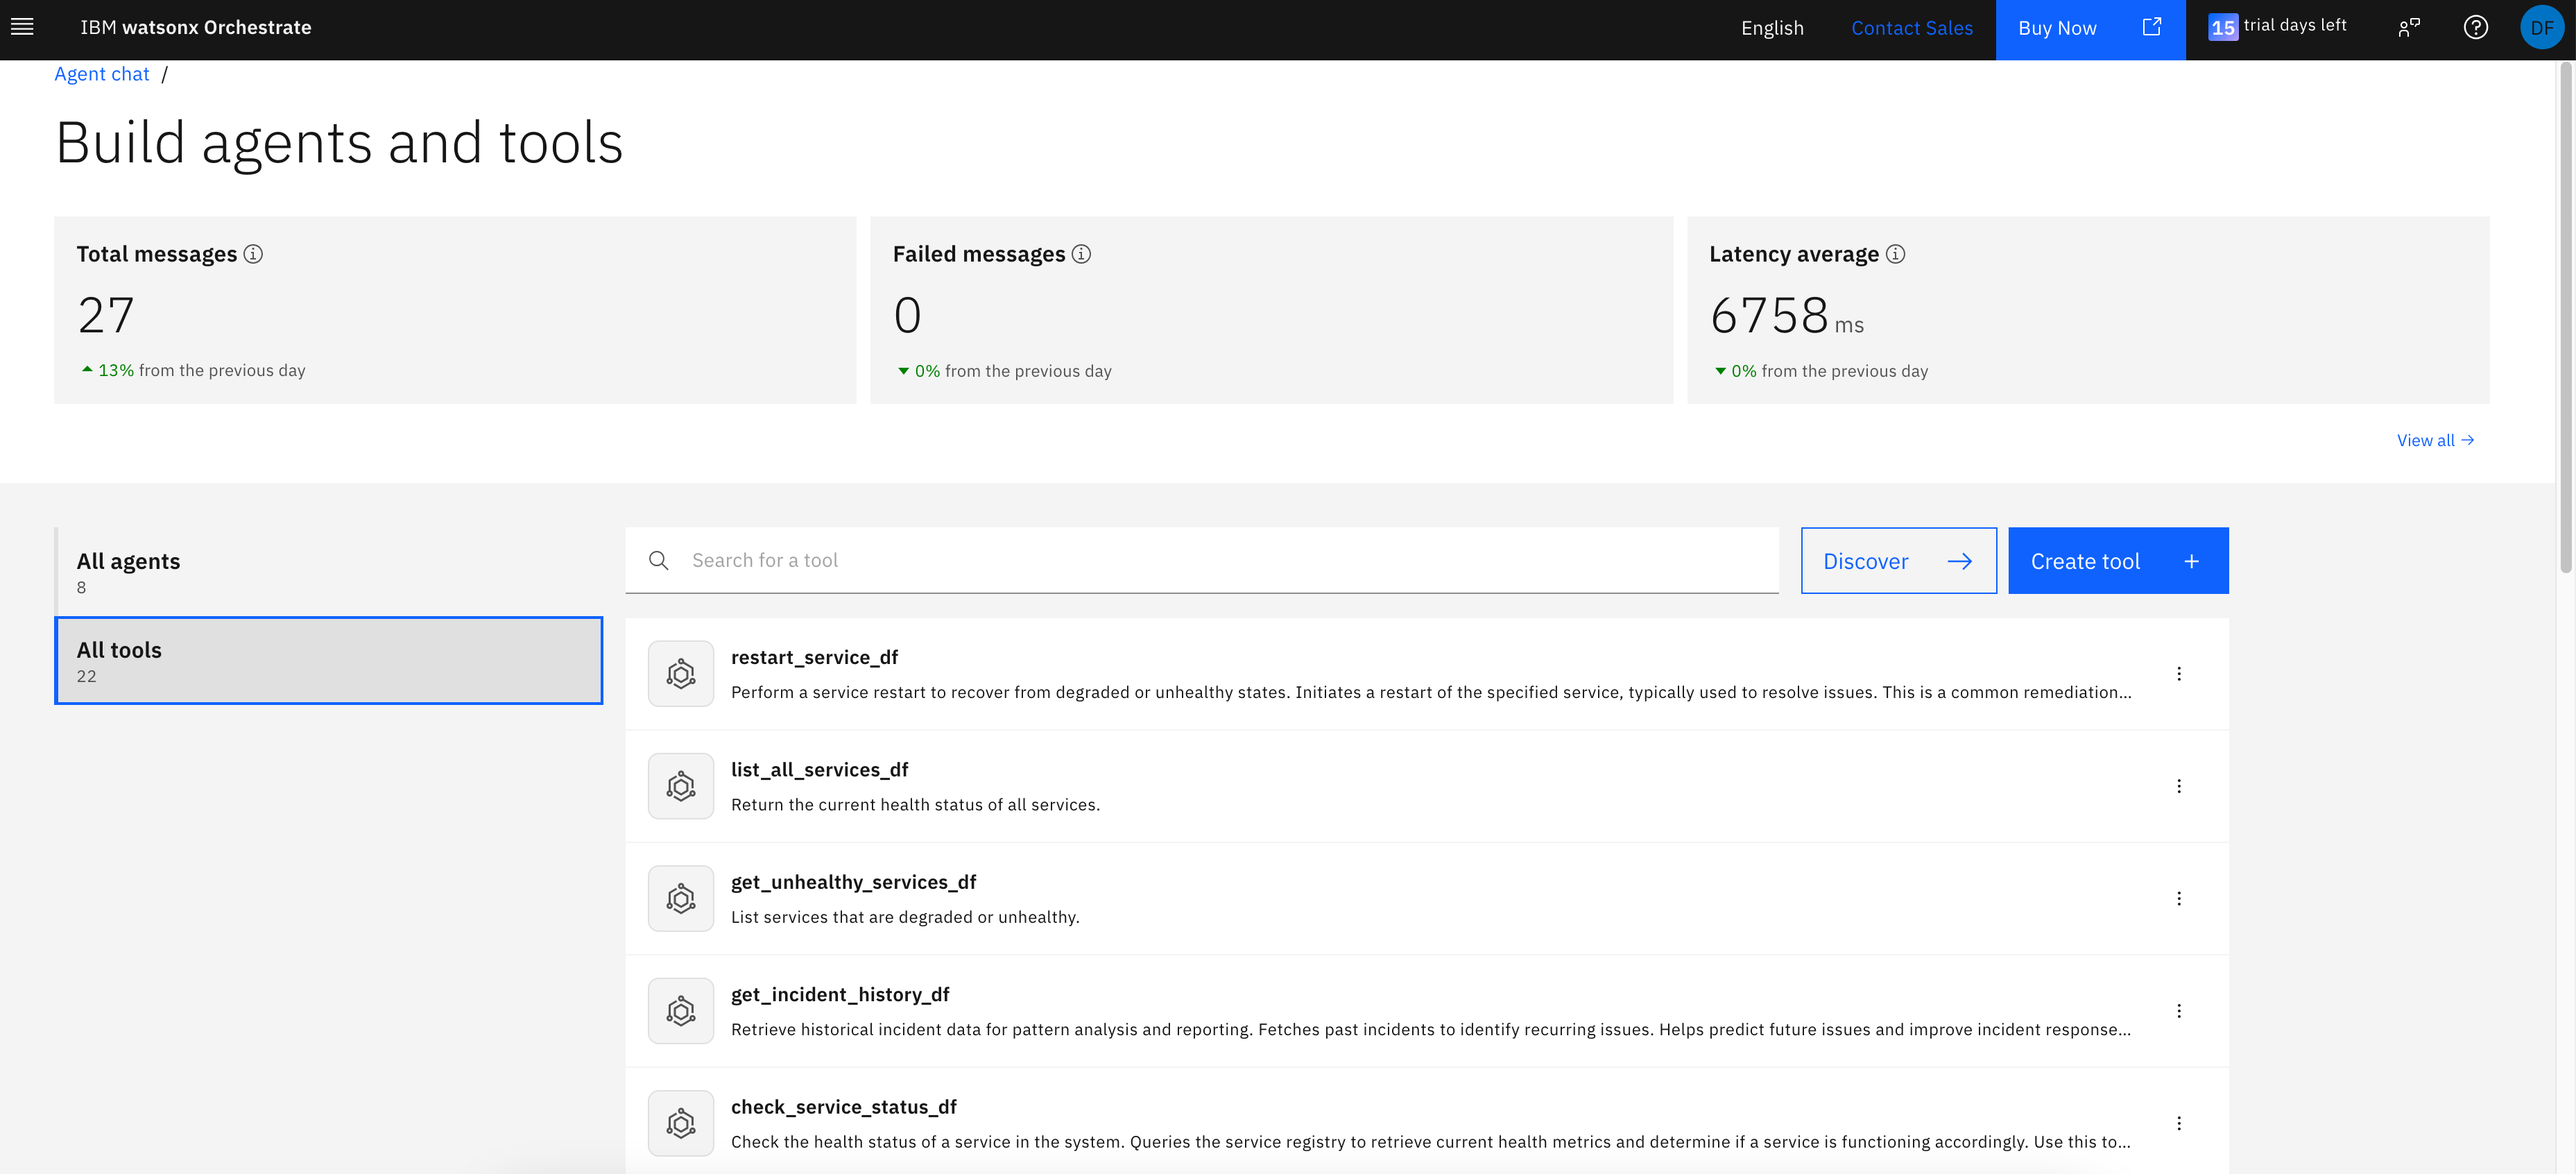

You can also use the command line to view existing tools, remove, etc.

In [ ]:
!orchestrate tools list

#### Import Agent into watsonx Orchestrate
**26.)** Run the command to import and create your agent! Make sure your ```sre_agent.yaml``` and ```tools``` folder are in the agent directory ```sre-metlife```

In [ ]:
!ls -l sre-metlife

In [ ]:
!orchestrate agents import -f ./sre-metlife/sre_agent.yaml

**27.)** Go to watsonx orchestrate Agent Builder [here](https://us-south.watson-orchestrate.cloud.ibm.com/build/manage), select the ```All Agents``` tab and you can view your Agent! If this does not take you directly to the Agent Builder you can follow the instructions in the Lab guide<br>
<br>
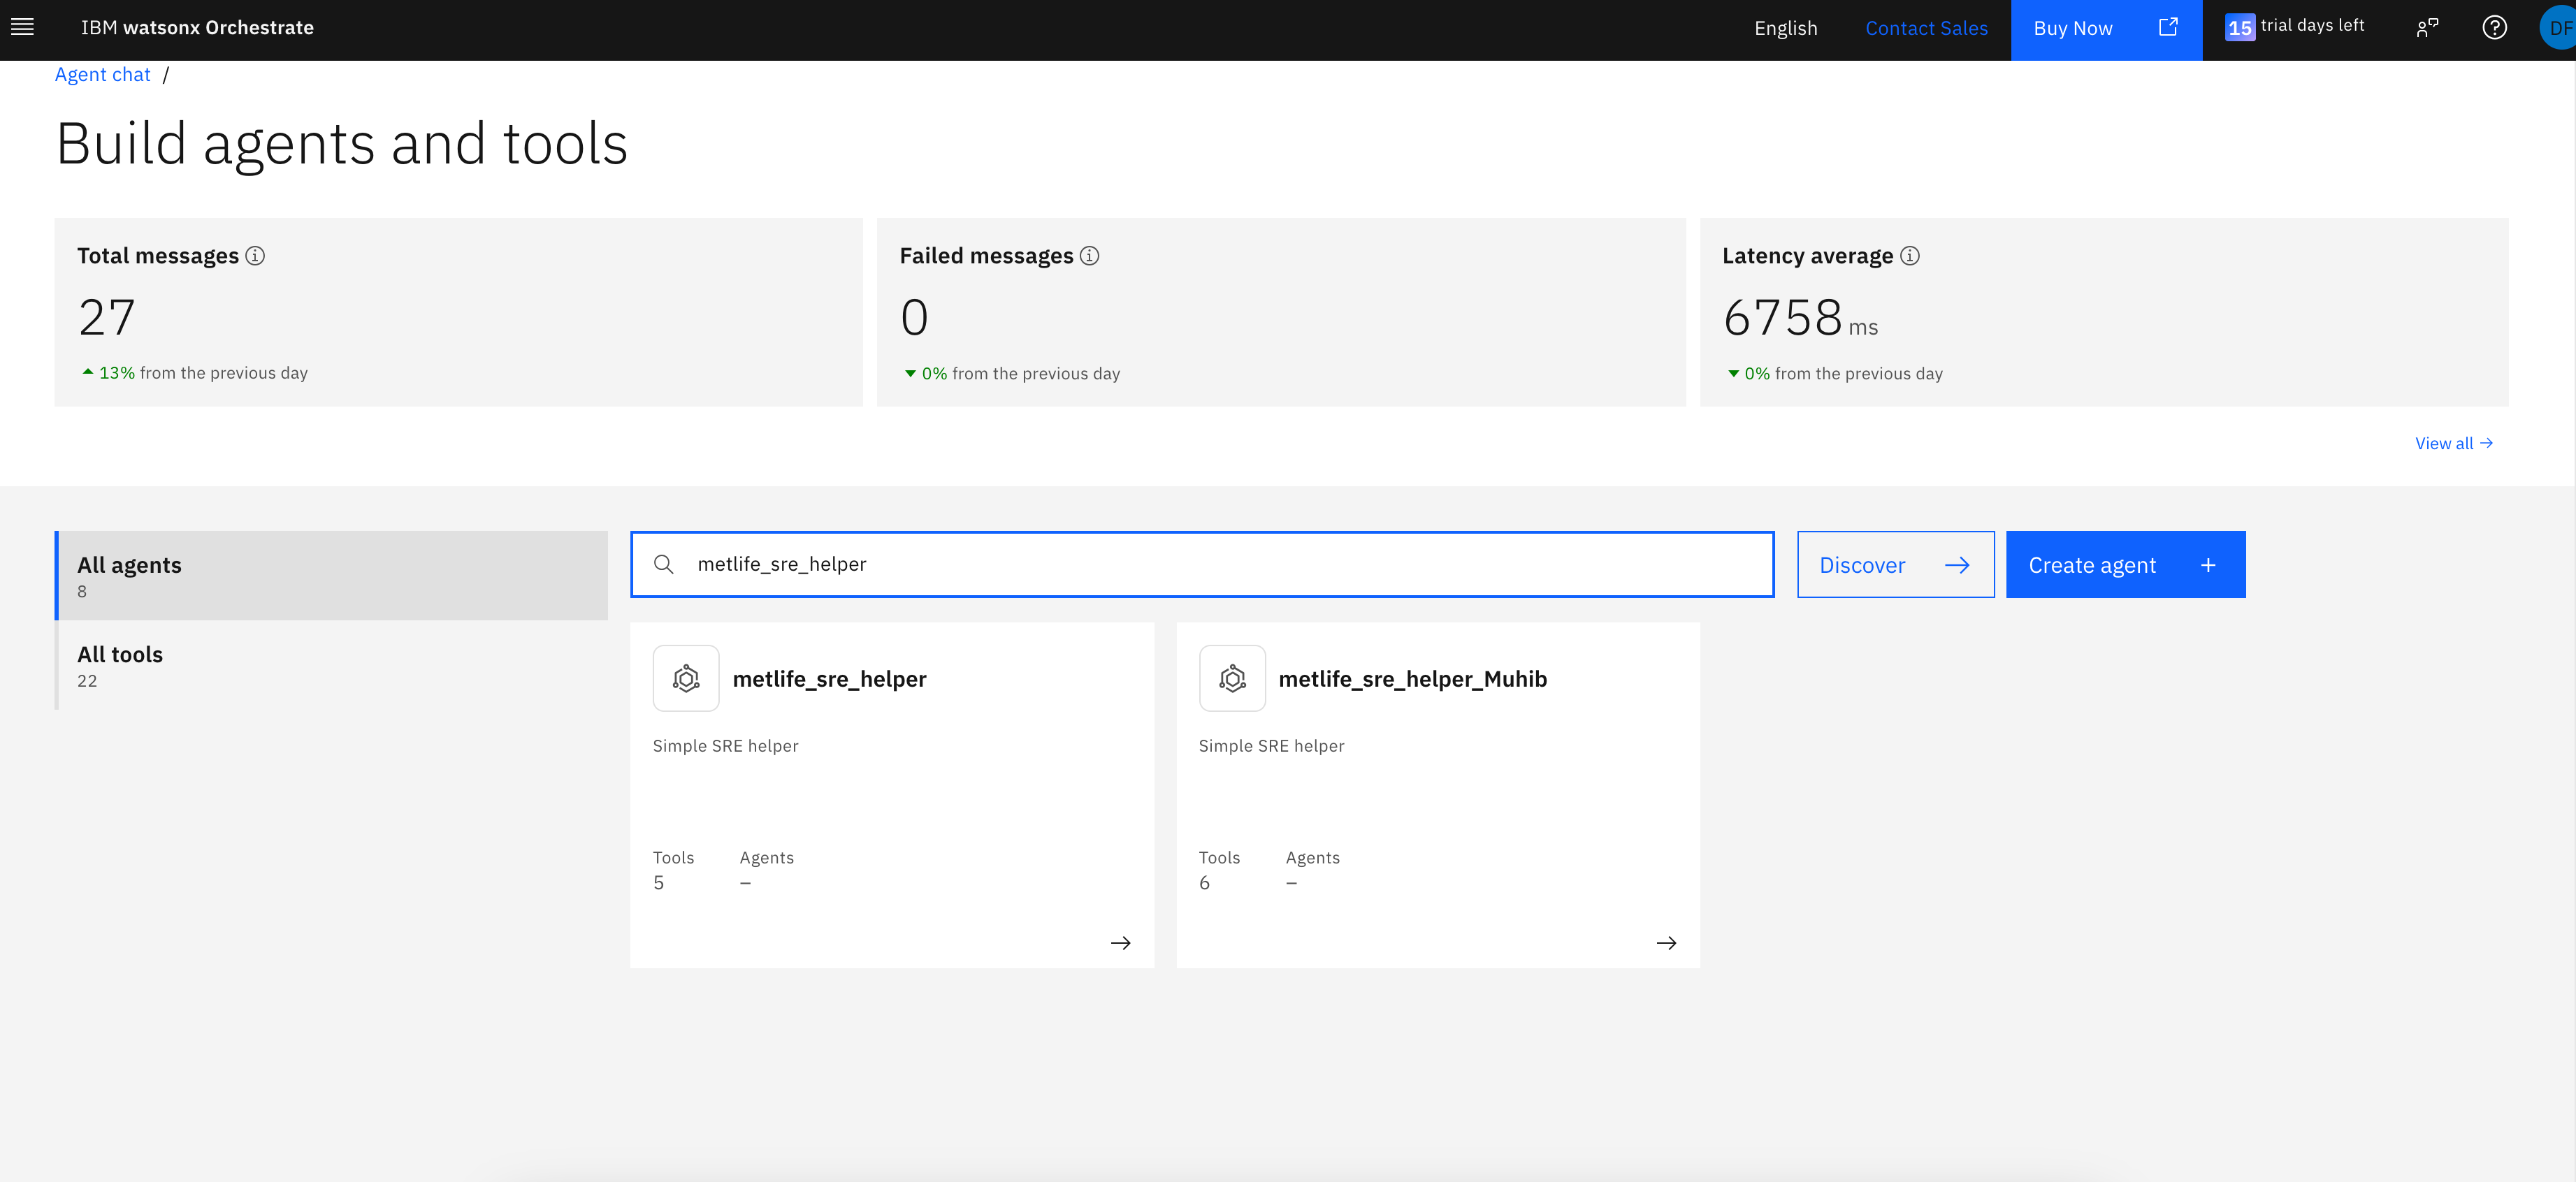

Click on your agent in the Agent Builder. Once you have entered the Agent you can see all Agent details and make any additional changes you may desire. Using the chat on the right you can test your Agent

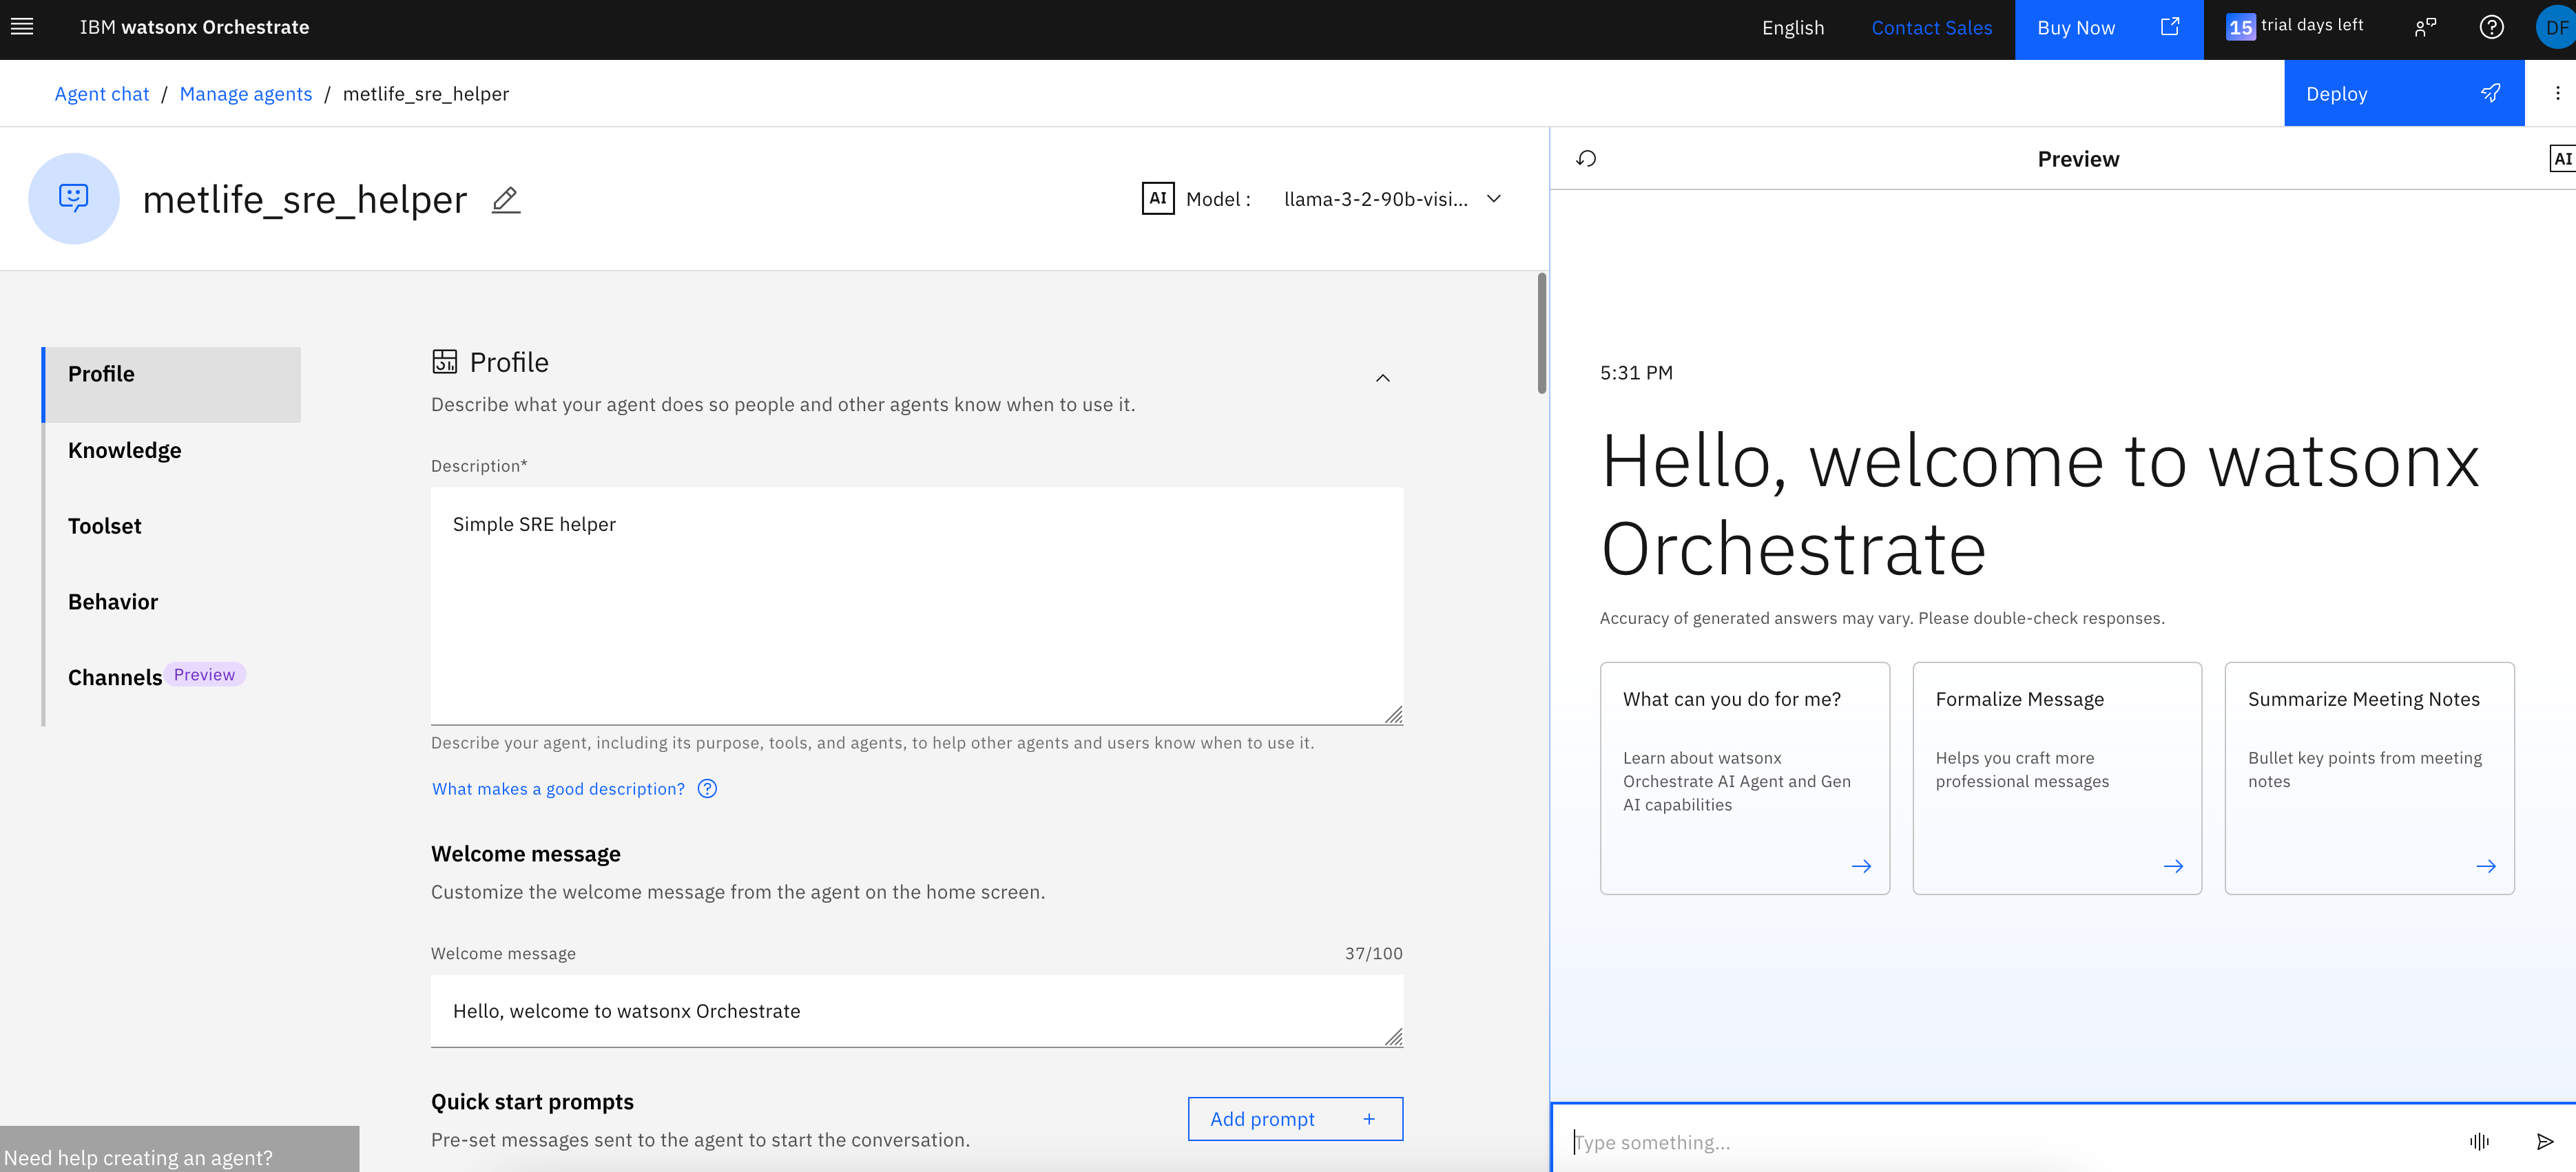

Notes : You can test your Agent using a local version of watsonx orchestrate with the watsonx Orchestrate Developer Edition but this is not a part of the lab. See more details [here](https://developer.watson-orchestrate.ibm.com/developer_edition/wxOde_overview#what-is-watsonx-orchestrate-developer-edition) on what the developer edition here.  This must be installed inside a docker container, for instructions on installing see details [here](https://developer.watson-orchestrate.ibm.com/developer_edition/wxOde_setup) 

### Test & Deploy your Agent!

### Test your Agent

**28.)** Now that you have a draft version of the Agent you can start testing to see how it performs with better understanding the state of your services within your organization. See below a set of test questions and corresponding responses, you should see something similar : 

**Question :** ```Show me all existing services within my organization``` <br>

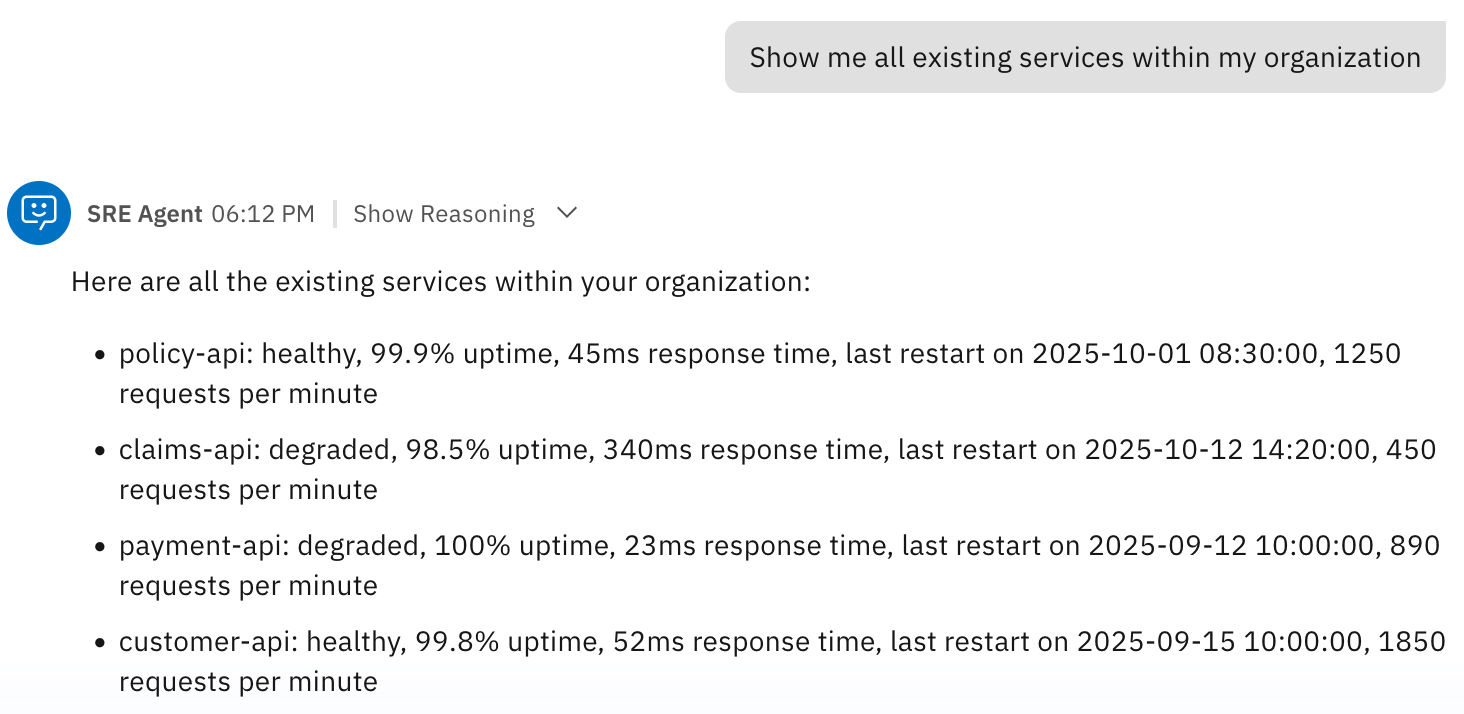

**Question :** ```Which of my services are unhealthy?``` <br>

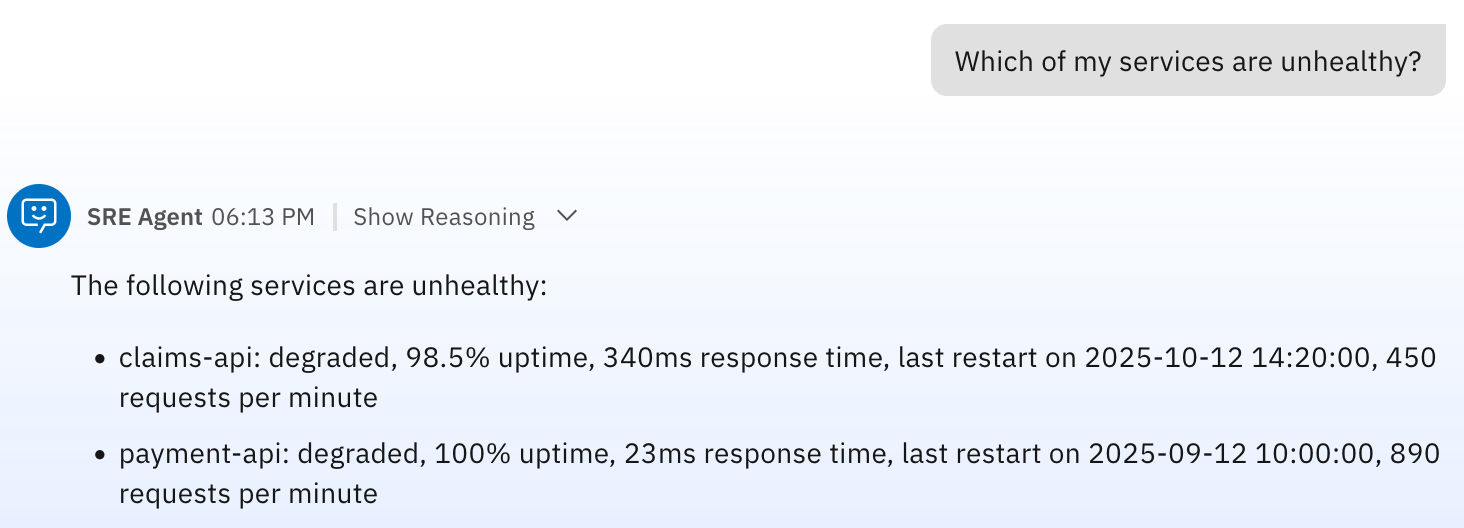

**Question :** ```What is the status of the claims api?``` <br>

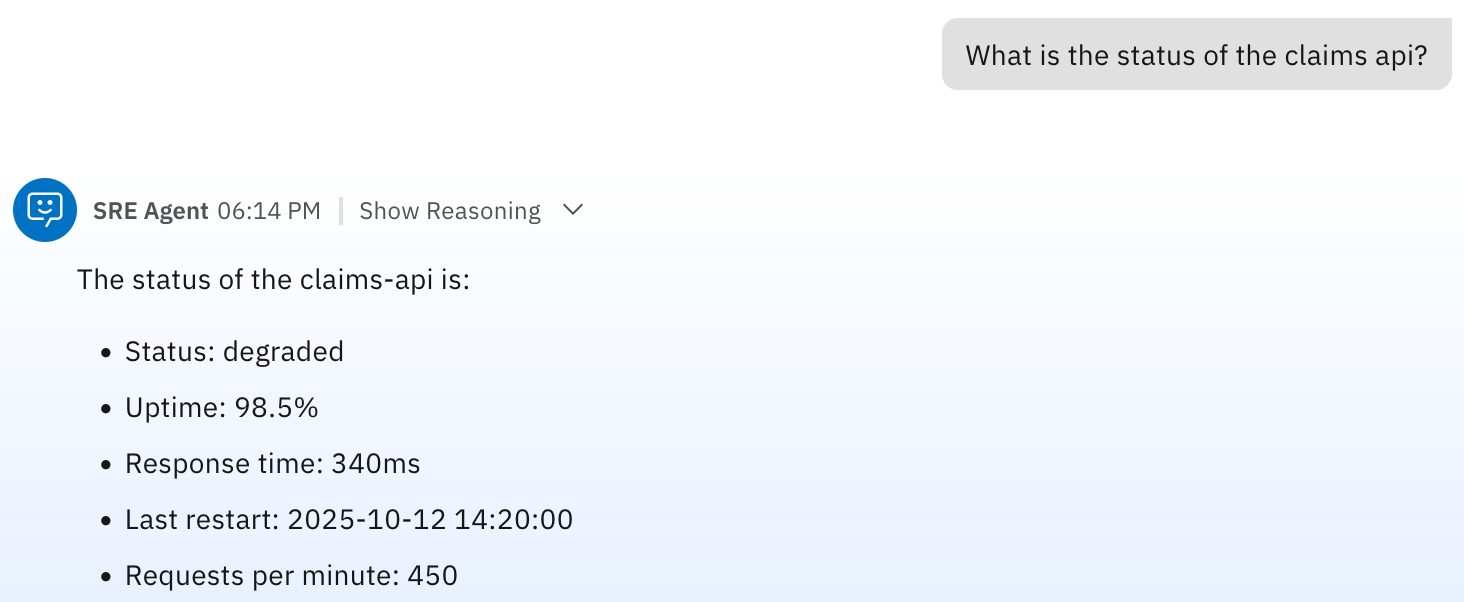

**Question :** ```Show me incidents for the claims api``` <br>

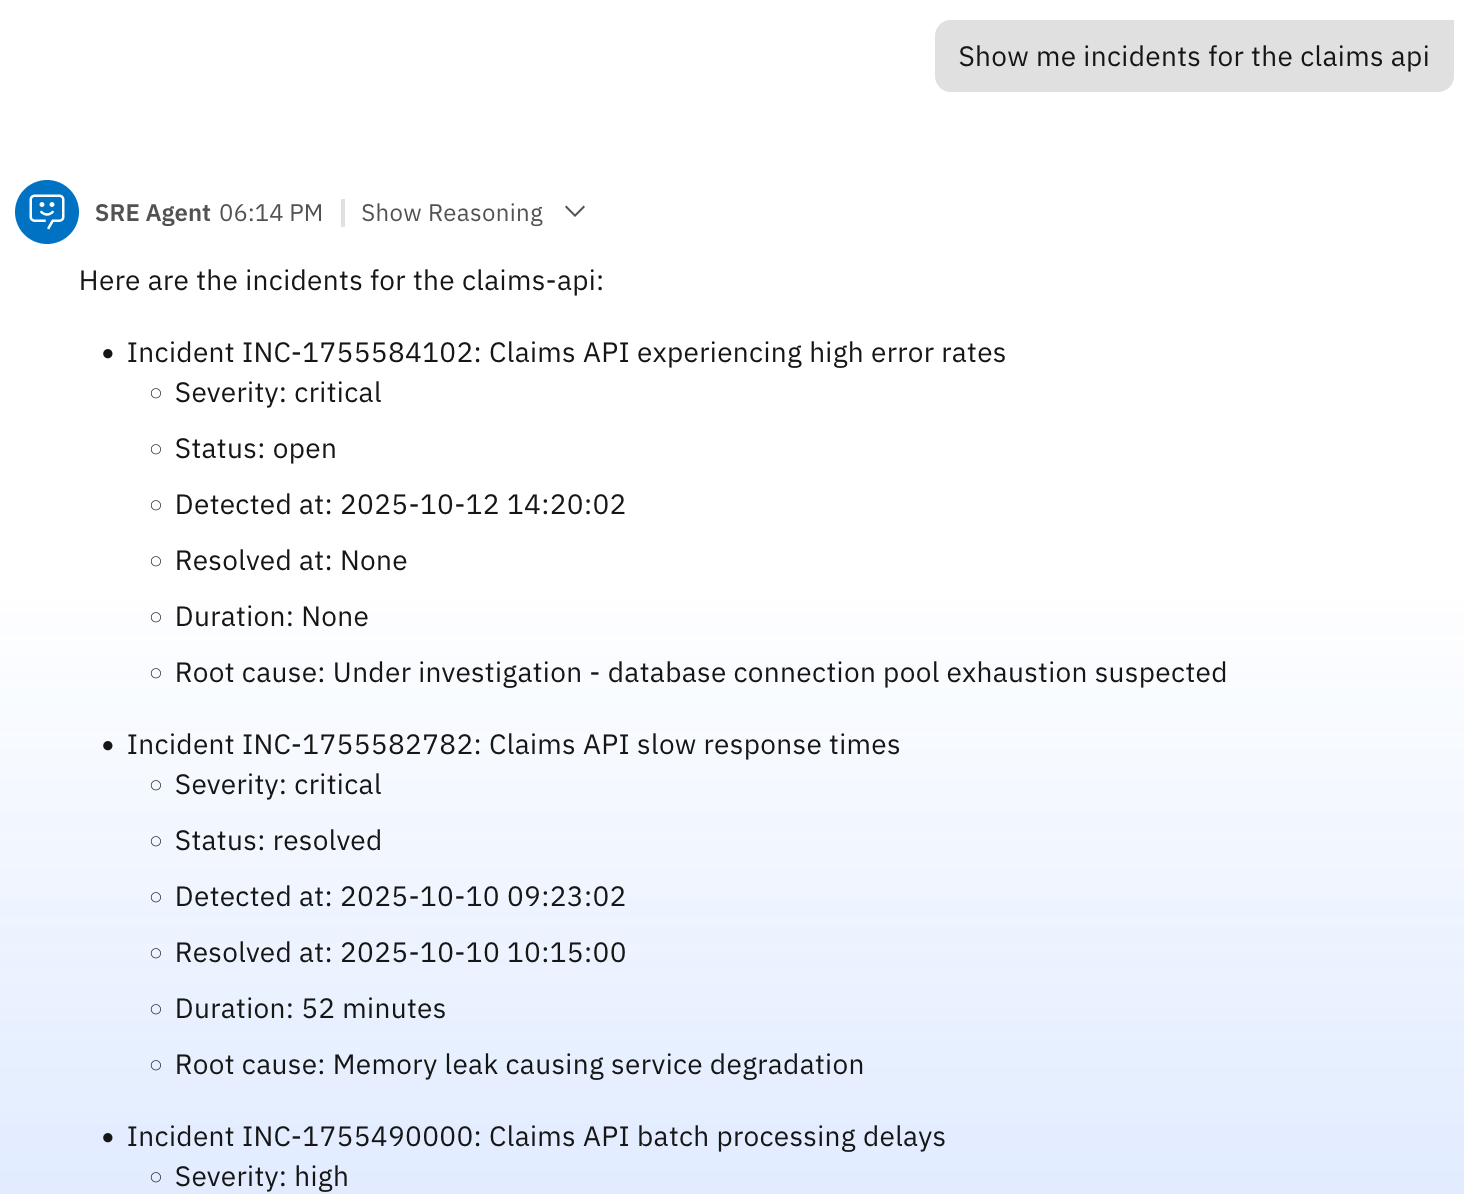

**Question :** ```Can you restart the claims api?``` <br>

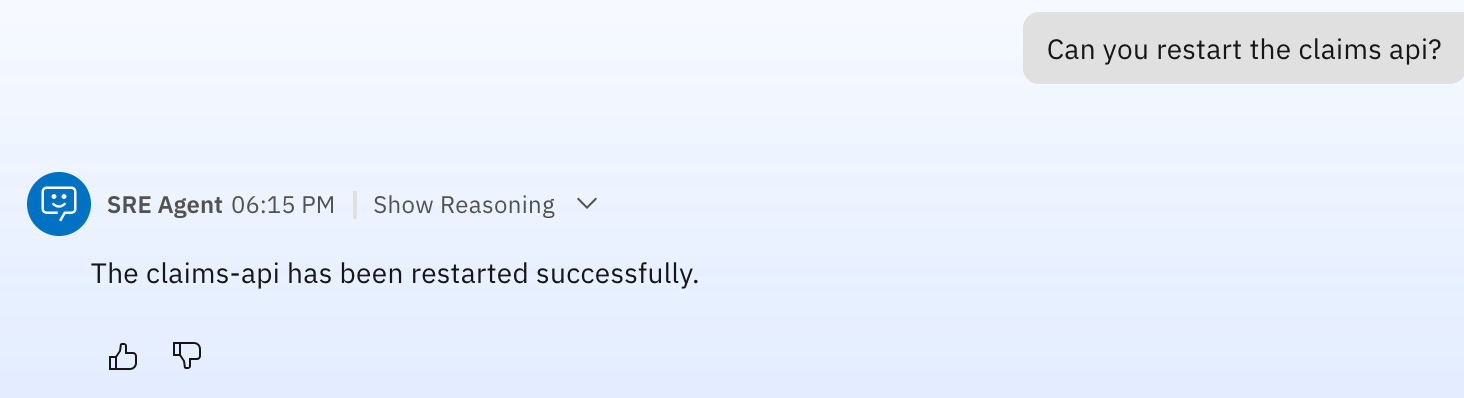

#### Deploy your Agent!
**29.)** Once you have tested and validated your agent and want to deploy it so it can be accessed within your enterprise environment.  Run the below command with your agent name ```(e.g. metlife_sre_helper_)``` replacing ```agent_name```

```orchestrate agents deploy --name agent_name```

In [ ]:
!orchestrate agents deploy --name <agent-name>

If you want to undeploy please run the below command <br>

```orchestrate agents undeploy --name agent_name```

#### Test your Deployed Agent!
30.) Now that you have deployed your Agent you can test it live within watsonx Orchestrate Chat. Navigate to the **Chat** by selecting the menu in the top left, and selecting **Chat** from the dropdown <br>
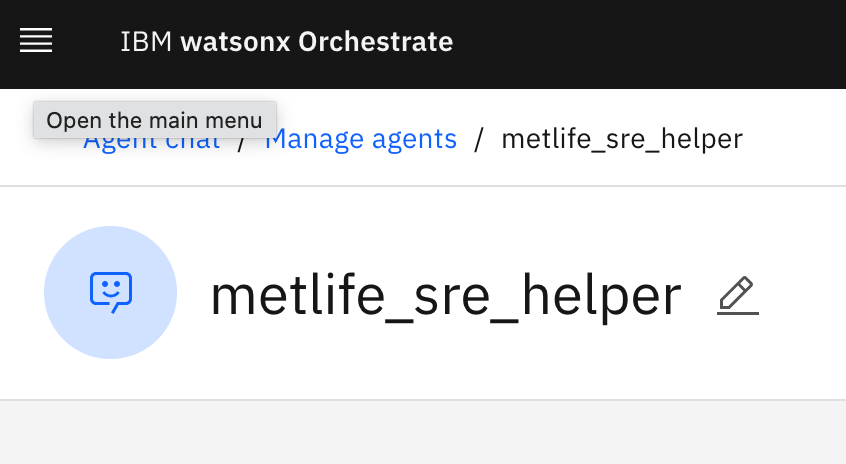
<br>
<br>
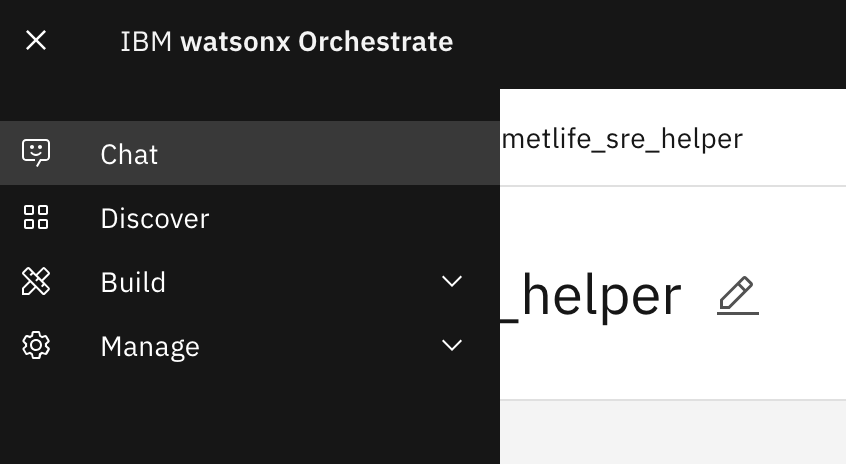

**31.)** Select the agent you deployed from the dropdown on the left<br>
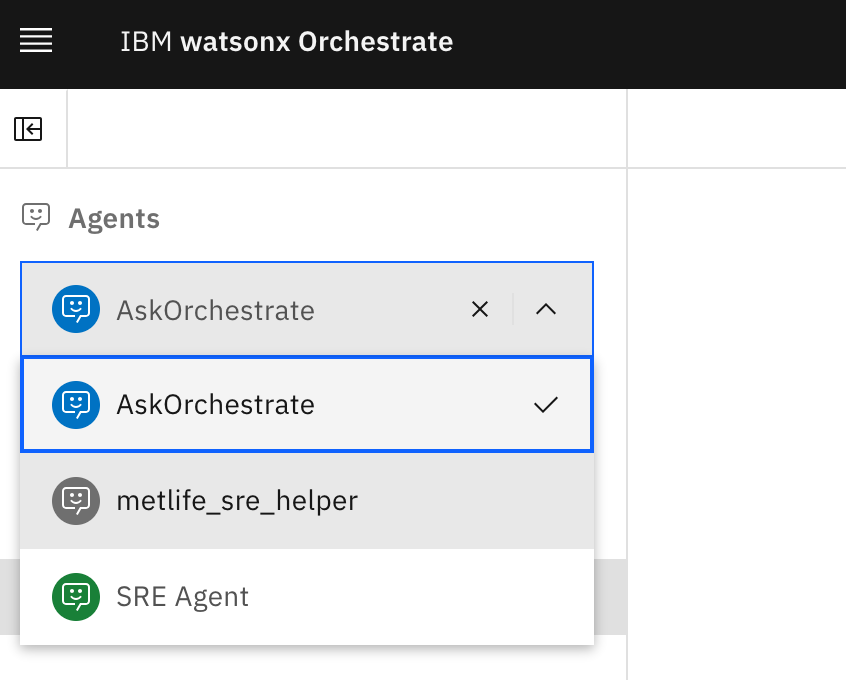

**32.)** Once you have selected your Agent and see it in the dropdown in the top left, you may test your deployed Agent live in the chat bar at the bottom of the screen!<br>
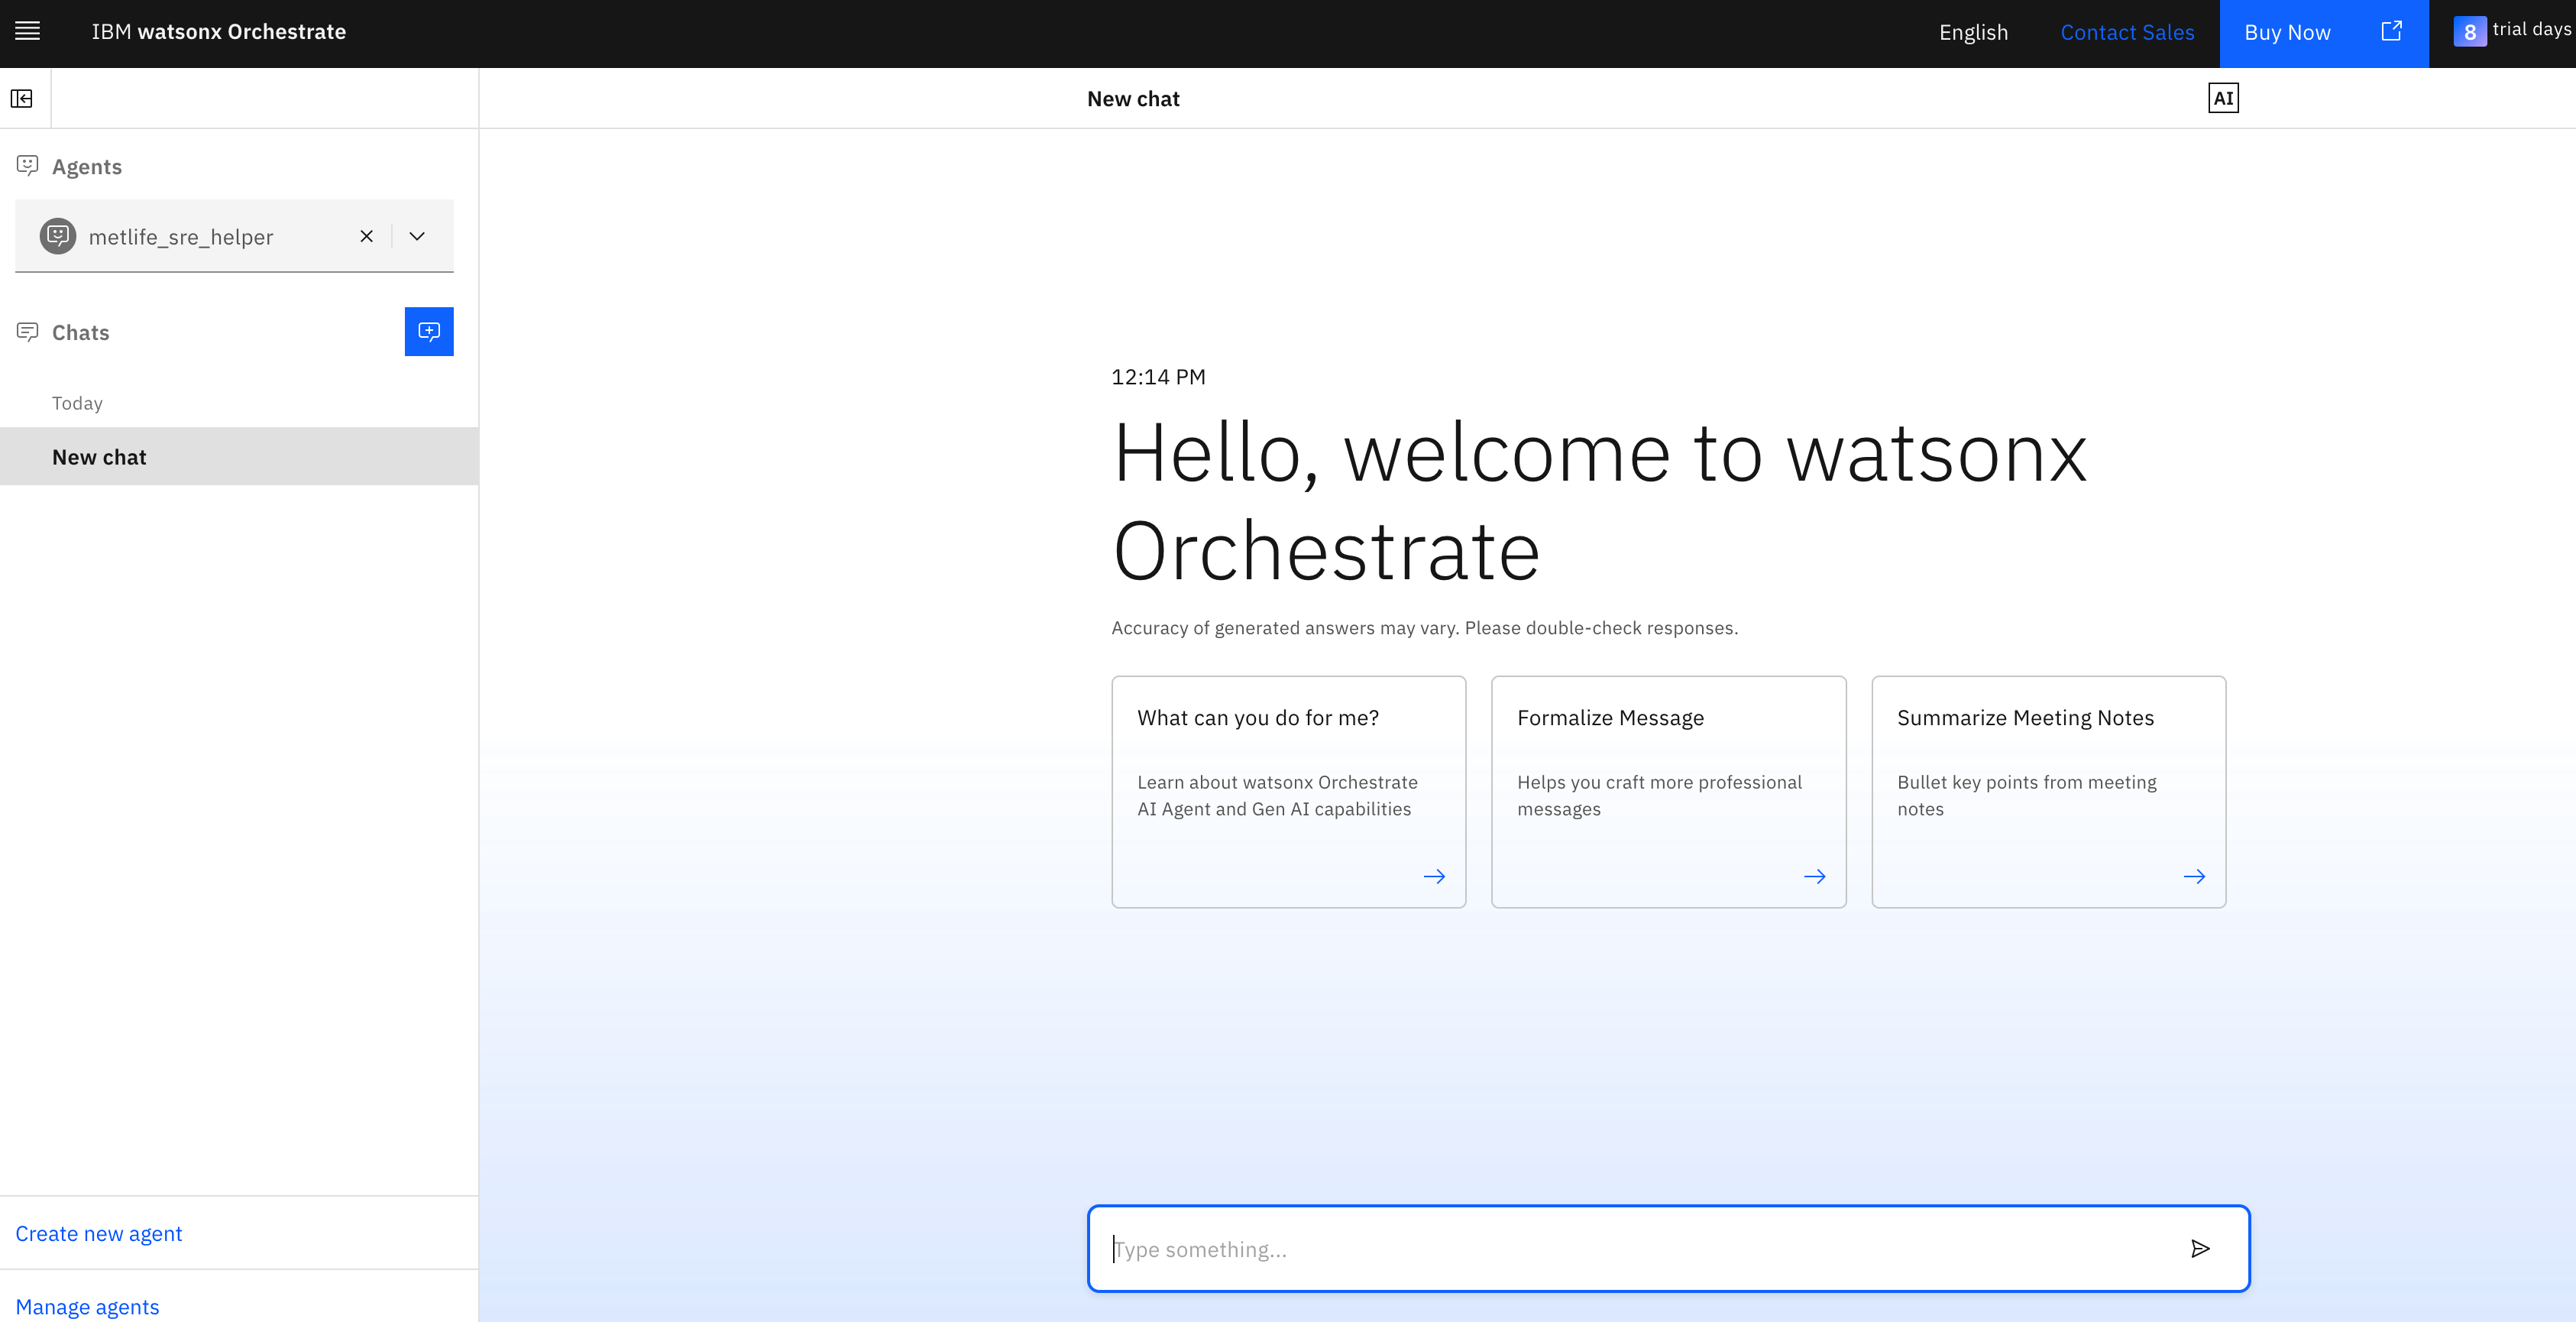

##### Additional Links :

[ADK Developer Edition](https://developer.watson-orchestrate.ibm.com/environment/initiate_environment)